$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 3: Mini-Project
<a id=part3></a>

### Guidelines

## Sentiment Analysis with Self-Attention and Word Embeddings

Based on Tutorials 6 and 7, we'll implement and train an improved sentiment analysis model.
We'll use self-attention instead of RNNs and incorporate pre-trained word embeddings.

In tutorial 6 we saw that we can train word embeddings together with the model.
Although this produces embeddings which are customized to the specific task at hand,
it also greatly increases training time.
A common technique is to use pre-trained word embeddings.
This is essentially a large mapping from words (e.g. in english) to some
high-dimensional vector, such that semantically similar words have an embedding that is
"close" by some metric (e.g. cosine distance).
Use the [GloVe](https://nlp.stanford.edu/projects/glove/) 6B embeddings for this purpose.
You can load these vectors into the weights of an `nn.Embedding` layer.

In tutorial 7 we learned how attention can be used to learn to predict a relative importance
for each element in a sequence, compared to the other elements.
Here, we'll replace the RNN with self-attention only approach similar to Transformer models, roughly based on [this paper](https://www.aclweb.org/anthology/W18-6219.pdf).
After embedding each word in the sentence using the pre-trained word-embedding a positional-encoding vector is added to provide each word in the sentence a unique value based on it's location.
One or more self-attention layers are then applied to the results, to obtain an importance weighting for each word.
Then we classify the sentence based on the average these weighted encodings.


Now, using these approaches, you need to:

- Implement a **baseline** model: Use pre-trained embeddings with an RNN-based model.
You can use LSTM/GRU or bi-directional versions of these, in a way very similar to what we implemented in the tutorial.
-  Implement an **improved** model: Based on the self-attention approach, implement an attention-based sentiment analysis model that has 1-2 self-attention layers instead of an RNN. You should use the same pre-trained word embeddings for this model.
- You can use pytorch's built-in RNNs, attention layers, etc.
- For positional encoding you can use the sinosoidal approach described in the paper (first proposed [here](https://arxiv.org/pdf/1706.03762.pdf)). You can use existing online implementations (even though it's straightforward to implement). 
- You can use the SST database as shown in the tutorial.

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis: compare the baseline to the improved model. Compare in terms of overall classification accuracy and show a multiclass confusion matrix.
- Visualize of the attention maps for a few movie reviews from each class, and explain the results.

# Sentiment Analysis Using Self Attention, with GloVe 6B Embedding
## Authors : Yiftach Edelstein And Gur Telem

### Data Analysis 

We began with this project by first analysing the data, its variability, and its length vs sentiment classes. we thought it would provide some insights with the final results, which we hope to show you here.

#### Rough split
We begin working on this dataset, by first, analyzing what is the split of data to the sentiment classes in the actual data set. we decided we must first know, what is the actual data split of our dataset, in order to "understand" the network and the attention mechanisms we will use.
<div>
    <img src="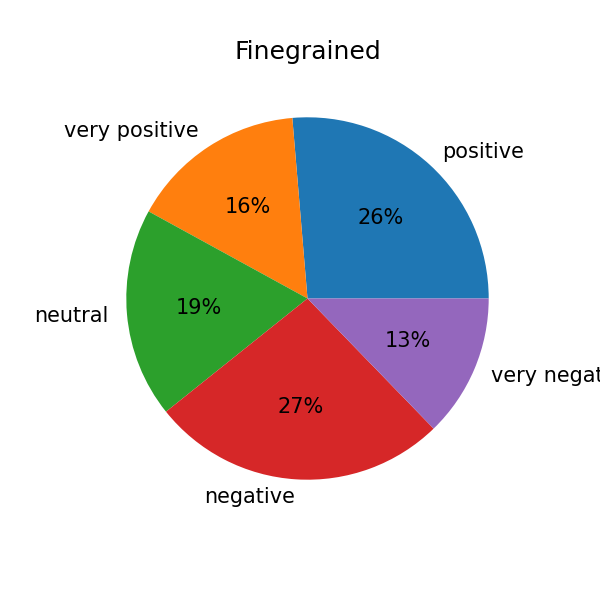
" width="45%"/>
    <img src="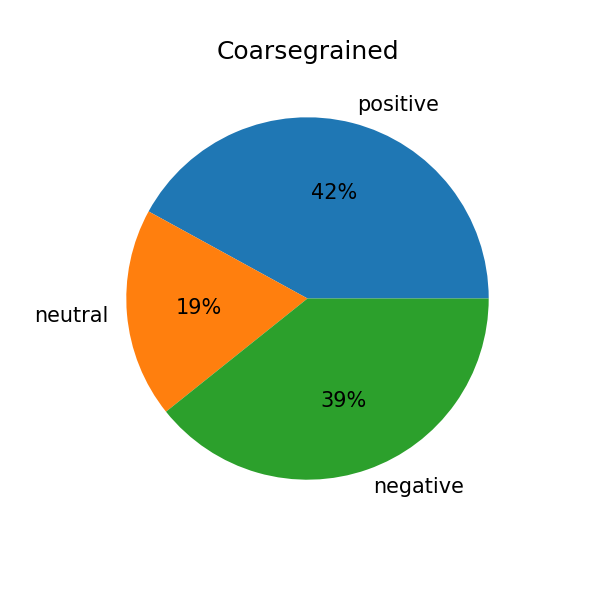
" width="45%"/>
</div>

we can see the split is roughly the same between negative and positive reviews, while the neutral reviews is a small minority. 
in addition, the extreme reviews are not as common, as seeing the very negative and very positive reviews, are both somewhat uncommon.

##### Length VS Final Sentiment
<div>
    <img src="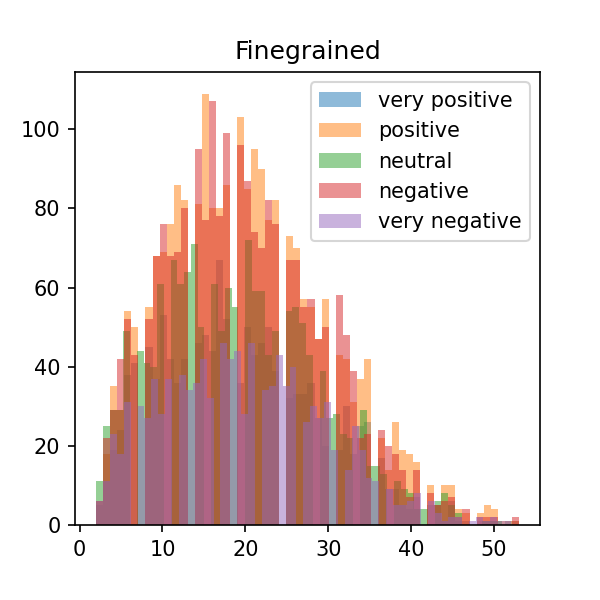
" width="45%"/>
    <img src="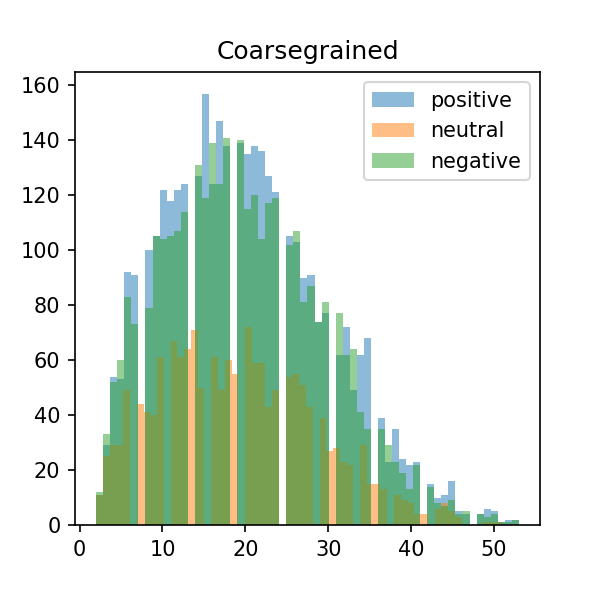
" width="45%"/>
</div>
in the fine grained graph, We can see (even though it is a bit crowded) that the very positive reviews and the neutral are shorter than most, but all other lengths split roughly equally accross all lengths of sentence and review sequences. 
and looking at it not finely-grained:

in the coarse grained graph it's easier to see that the neutral reviews are typically shorter than other sentiments

### Training Procedure

Both Models were trained on the SST Dataset, using the code attached in the project directory, Using the finegrained SST-5 Class labels, with NLL Loss (similarily to the Tutorial about sequence models). The hyper parameters are described per model, below.
In order to run the training of the model, you must only run the following script:

#### LSTM

train_lstm.py

#### Attention

train_attention.py

the hyper parameters will already be there.

### LSTM Model
Here we applied the baseline model on the dataset, with a simple, LSTM, 2 layer, with dropout. 

<code>
   LSTMModel(
  (embedding): Embedding(15482, 300)
  (lstm_net): LSTM(300, 100, num_layers=2, batch_first=True, dropout=0.7)
  (output_layer): Linear(in_features=100, out_features=5, bias=False)
  (log_softmax): LogSoftmax(dim=1)
)
</code>

| Hyper Parameter | Value |
| :-: | :-: |
| Learning Rate | 0.0003 |
| Epochs | 70 |
| Layer Count | 2 | 
| Bidrectional | False |
| Dropout | 0.7 |
| Hidden Dim | 100 |


as a result, we have reached the following result on the test set:


| Test Loss | Test Accuracy |
| :-: | :-: |
| 1.393 | 41.6 |

with the following confusion matrix, where we have normalized it accross its columns, to see how much of the tagging was "correct":
<div>
<img src="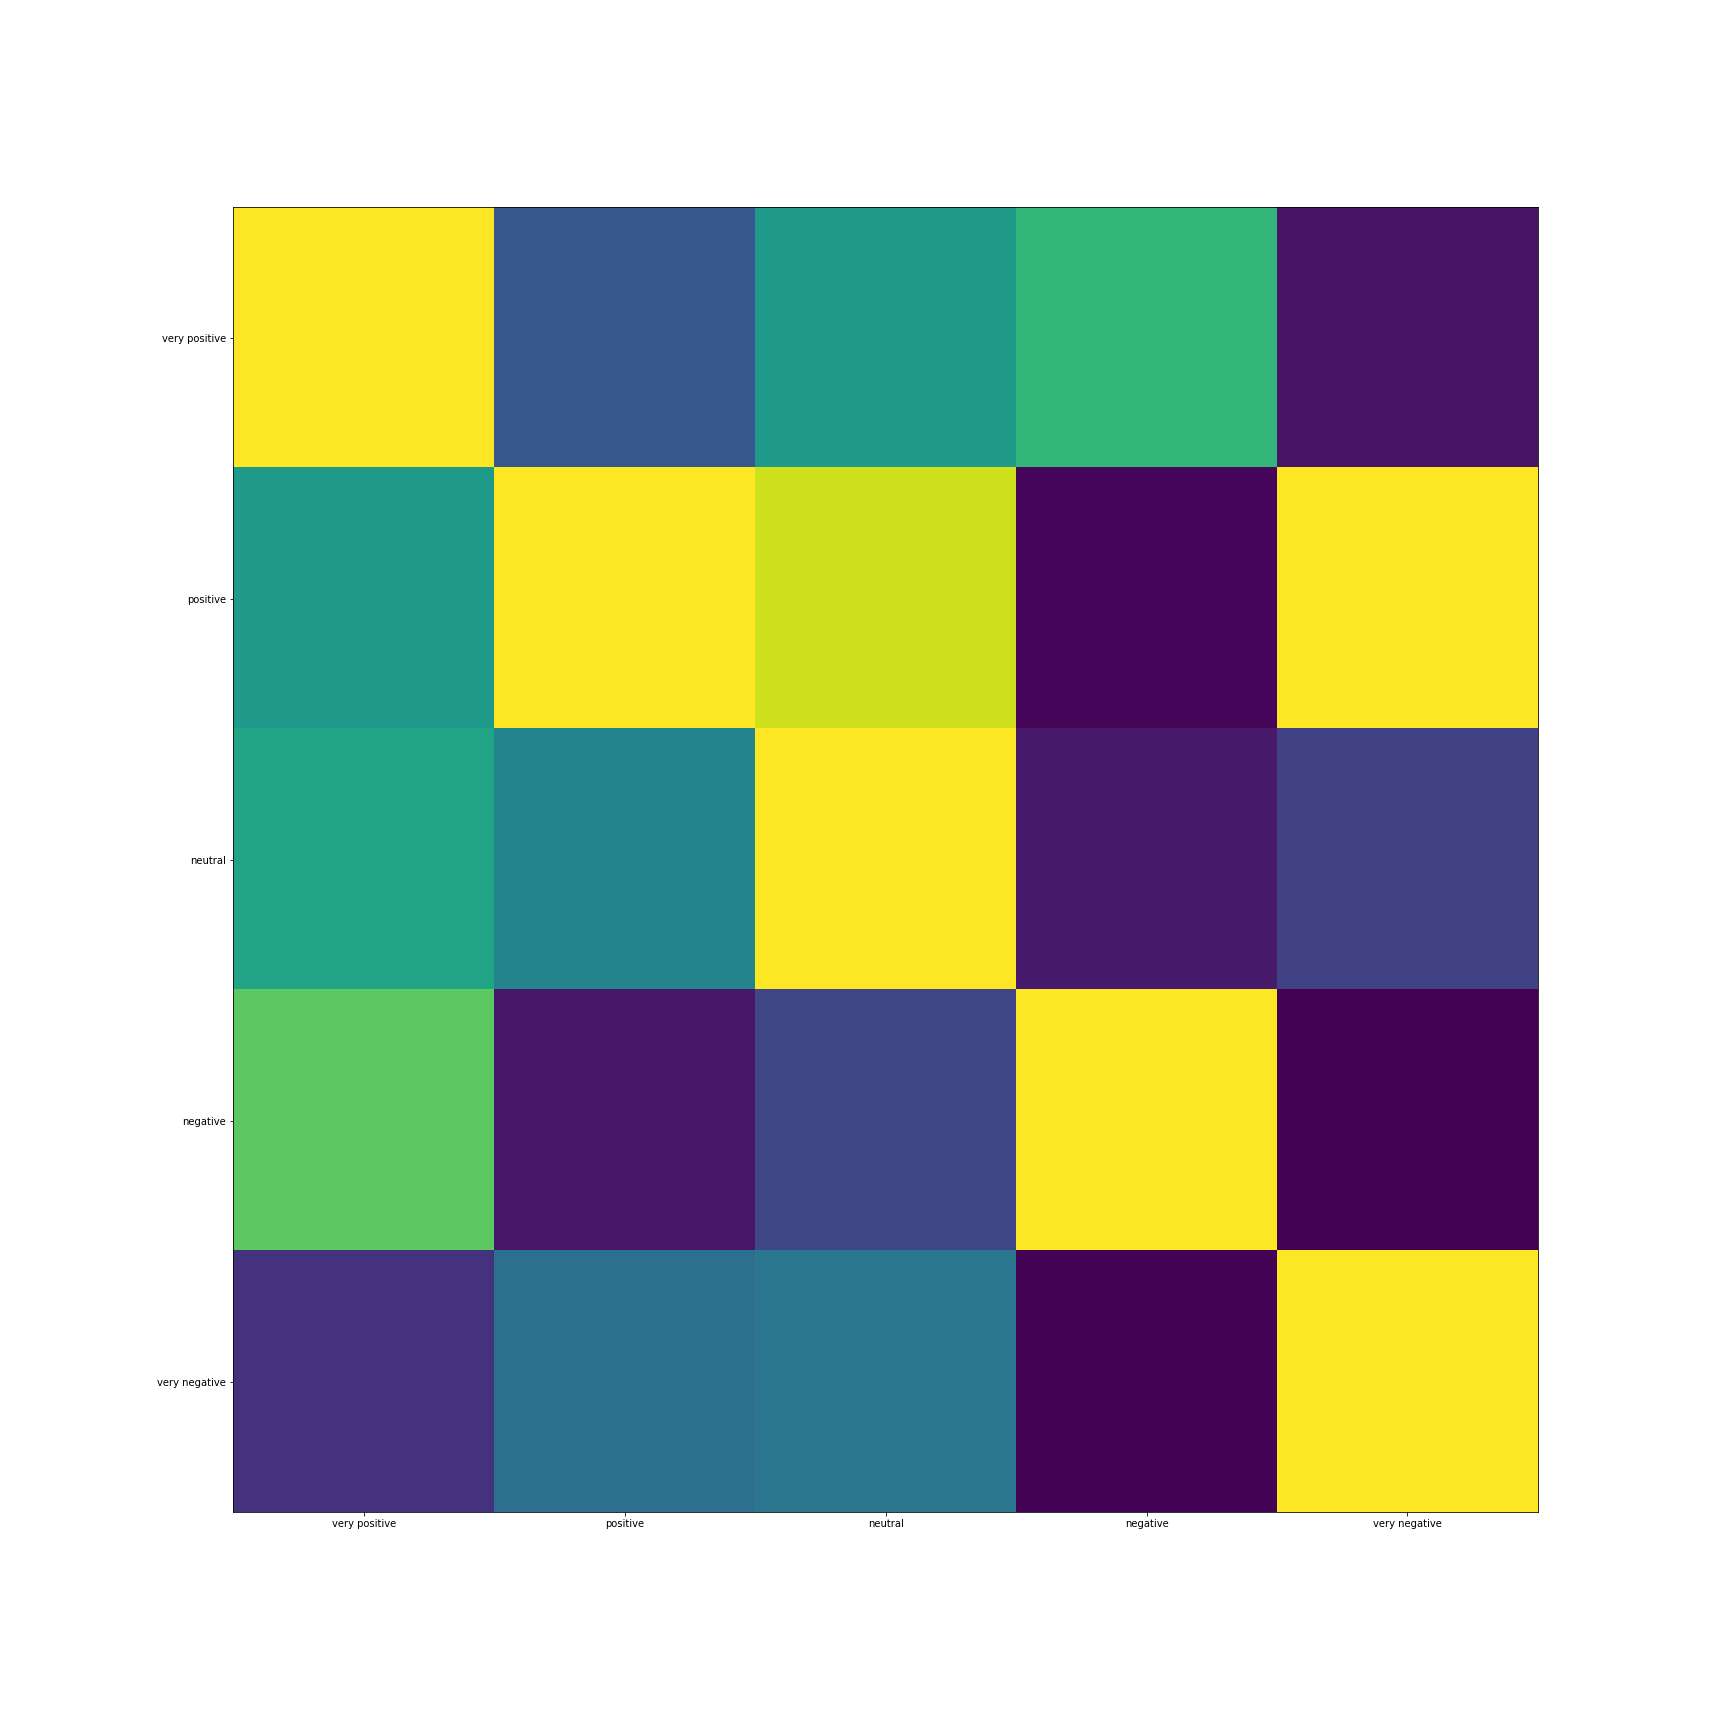
" width="1000"/>
</div>
as we can see here, the model is pretty good at understanding what review is positive, very positive, and negative. it fails at understanding neutrality, thinking it to be more positive than negative, which might result as part of the length of both mean reviews of those types, and is very bad at understanding what is very negative. this makes sense to us, seeing as there is very little data points of very negative reviews, which might result in our model not having enough reviews to properly understand what is negative. we also see that the very negative results aren't quite being able to be associated with negative results, so the net didn't understand the general sentiment either, and is confused between very negative and positive sentiment results


### Self Attention Model
Here we have modeled a net as a Self Attention network Model, with the following architecture:
<code>
AttentionModel(
  (layers): Sequential(
    (0): Embedding(15482, 300)
    (1): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (2): Sublayer(
      (attn): MultiplicativeAttention(
        (softmax): Softmax(dim=-1)
      )
      (channel_mod): Conv1d(300, 600, kernel_size=(1,), stride=(1,))
      (layer_norm): LayerNorm((600,), eps=1e-05, elementwise_affine=True)
    )
    (3): Linear(in_features=600, out_features=600, bias=False)
    (4): ReLU()
    (5): Dropout(p=0.7, inplace=False)
    (6): Sublayer(
      (attn): MultiplicativeAttention(
        (softmax): Softmax(dim=-1)
      )
      (channel_mod): Conv1d(600, 600, kernel_size=(1,), stride=(1,))
      (layer_norm): LayerNorm((600,), eps=1e-05, elementwise_affine=True)
    )
  )
  (fc): Linear(in_features=600, out_features=5, bias=False)
)
</code>


| Test Loss | Test Accuracy |
| --- | --- |
| 1.303 | 44.7 |


With the following hyper parameters:


| Hyper Parameter | Value |
| :-: | :-: |
| Learning Rate | 0.0001 |
| Epochs | 70 |
| Layer Count | 2 | 
| Dropout | 0.7 |
| Positional Encoding Dropout | 0.1 |




and these is the result we have reached on the test set:


<div>
<img src="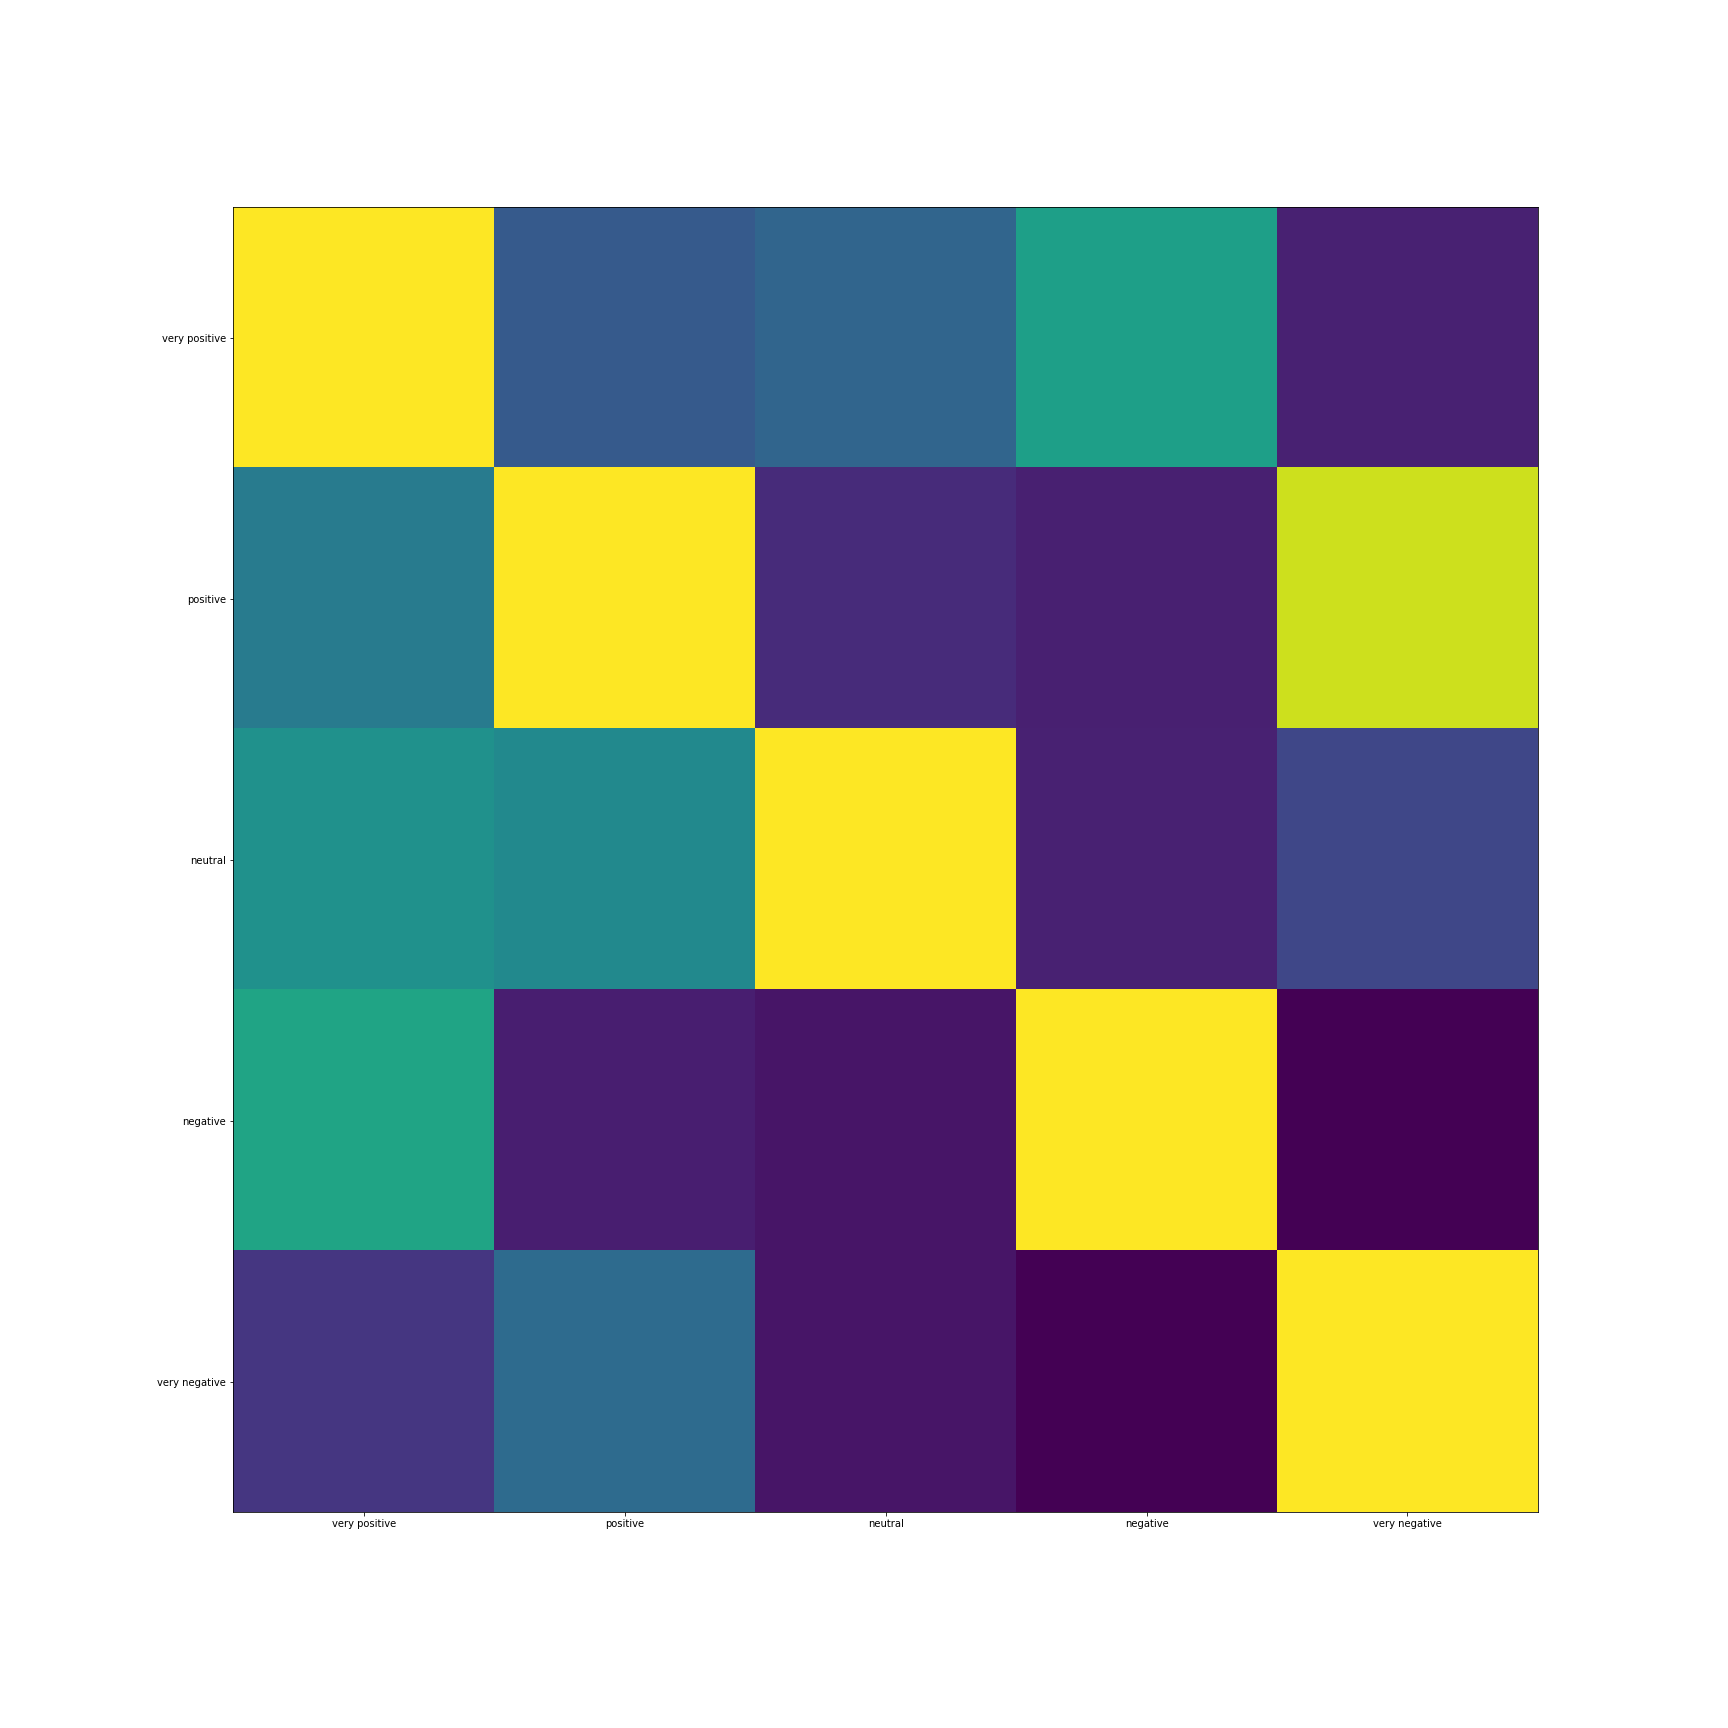
" width="1000"/>
</div>

We have seen that a 2 layer SSAN(as described in the paper) reached some very nice results, but not quite the results reached in the paper. we think there could be some improvements found in using a multi-headded setup, with the proper hyper-params, but we are quite satisfied with the results. we can see that the confusion matrix shows a very neat situation, where the net is very good at tagging the appropriate sentiment to its proper value, and where it makes a mistake it is very homogenous on its mistake, therefore, not leaning heavily to any other sentiment. this means the net is length invariant as wanted. 

Some attention matrices to see some issues and interesting ideas we saw happen:

We'll look at them label by label:

#### Very Positive:

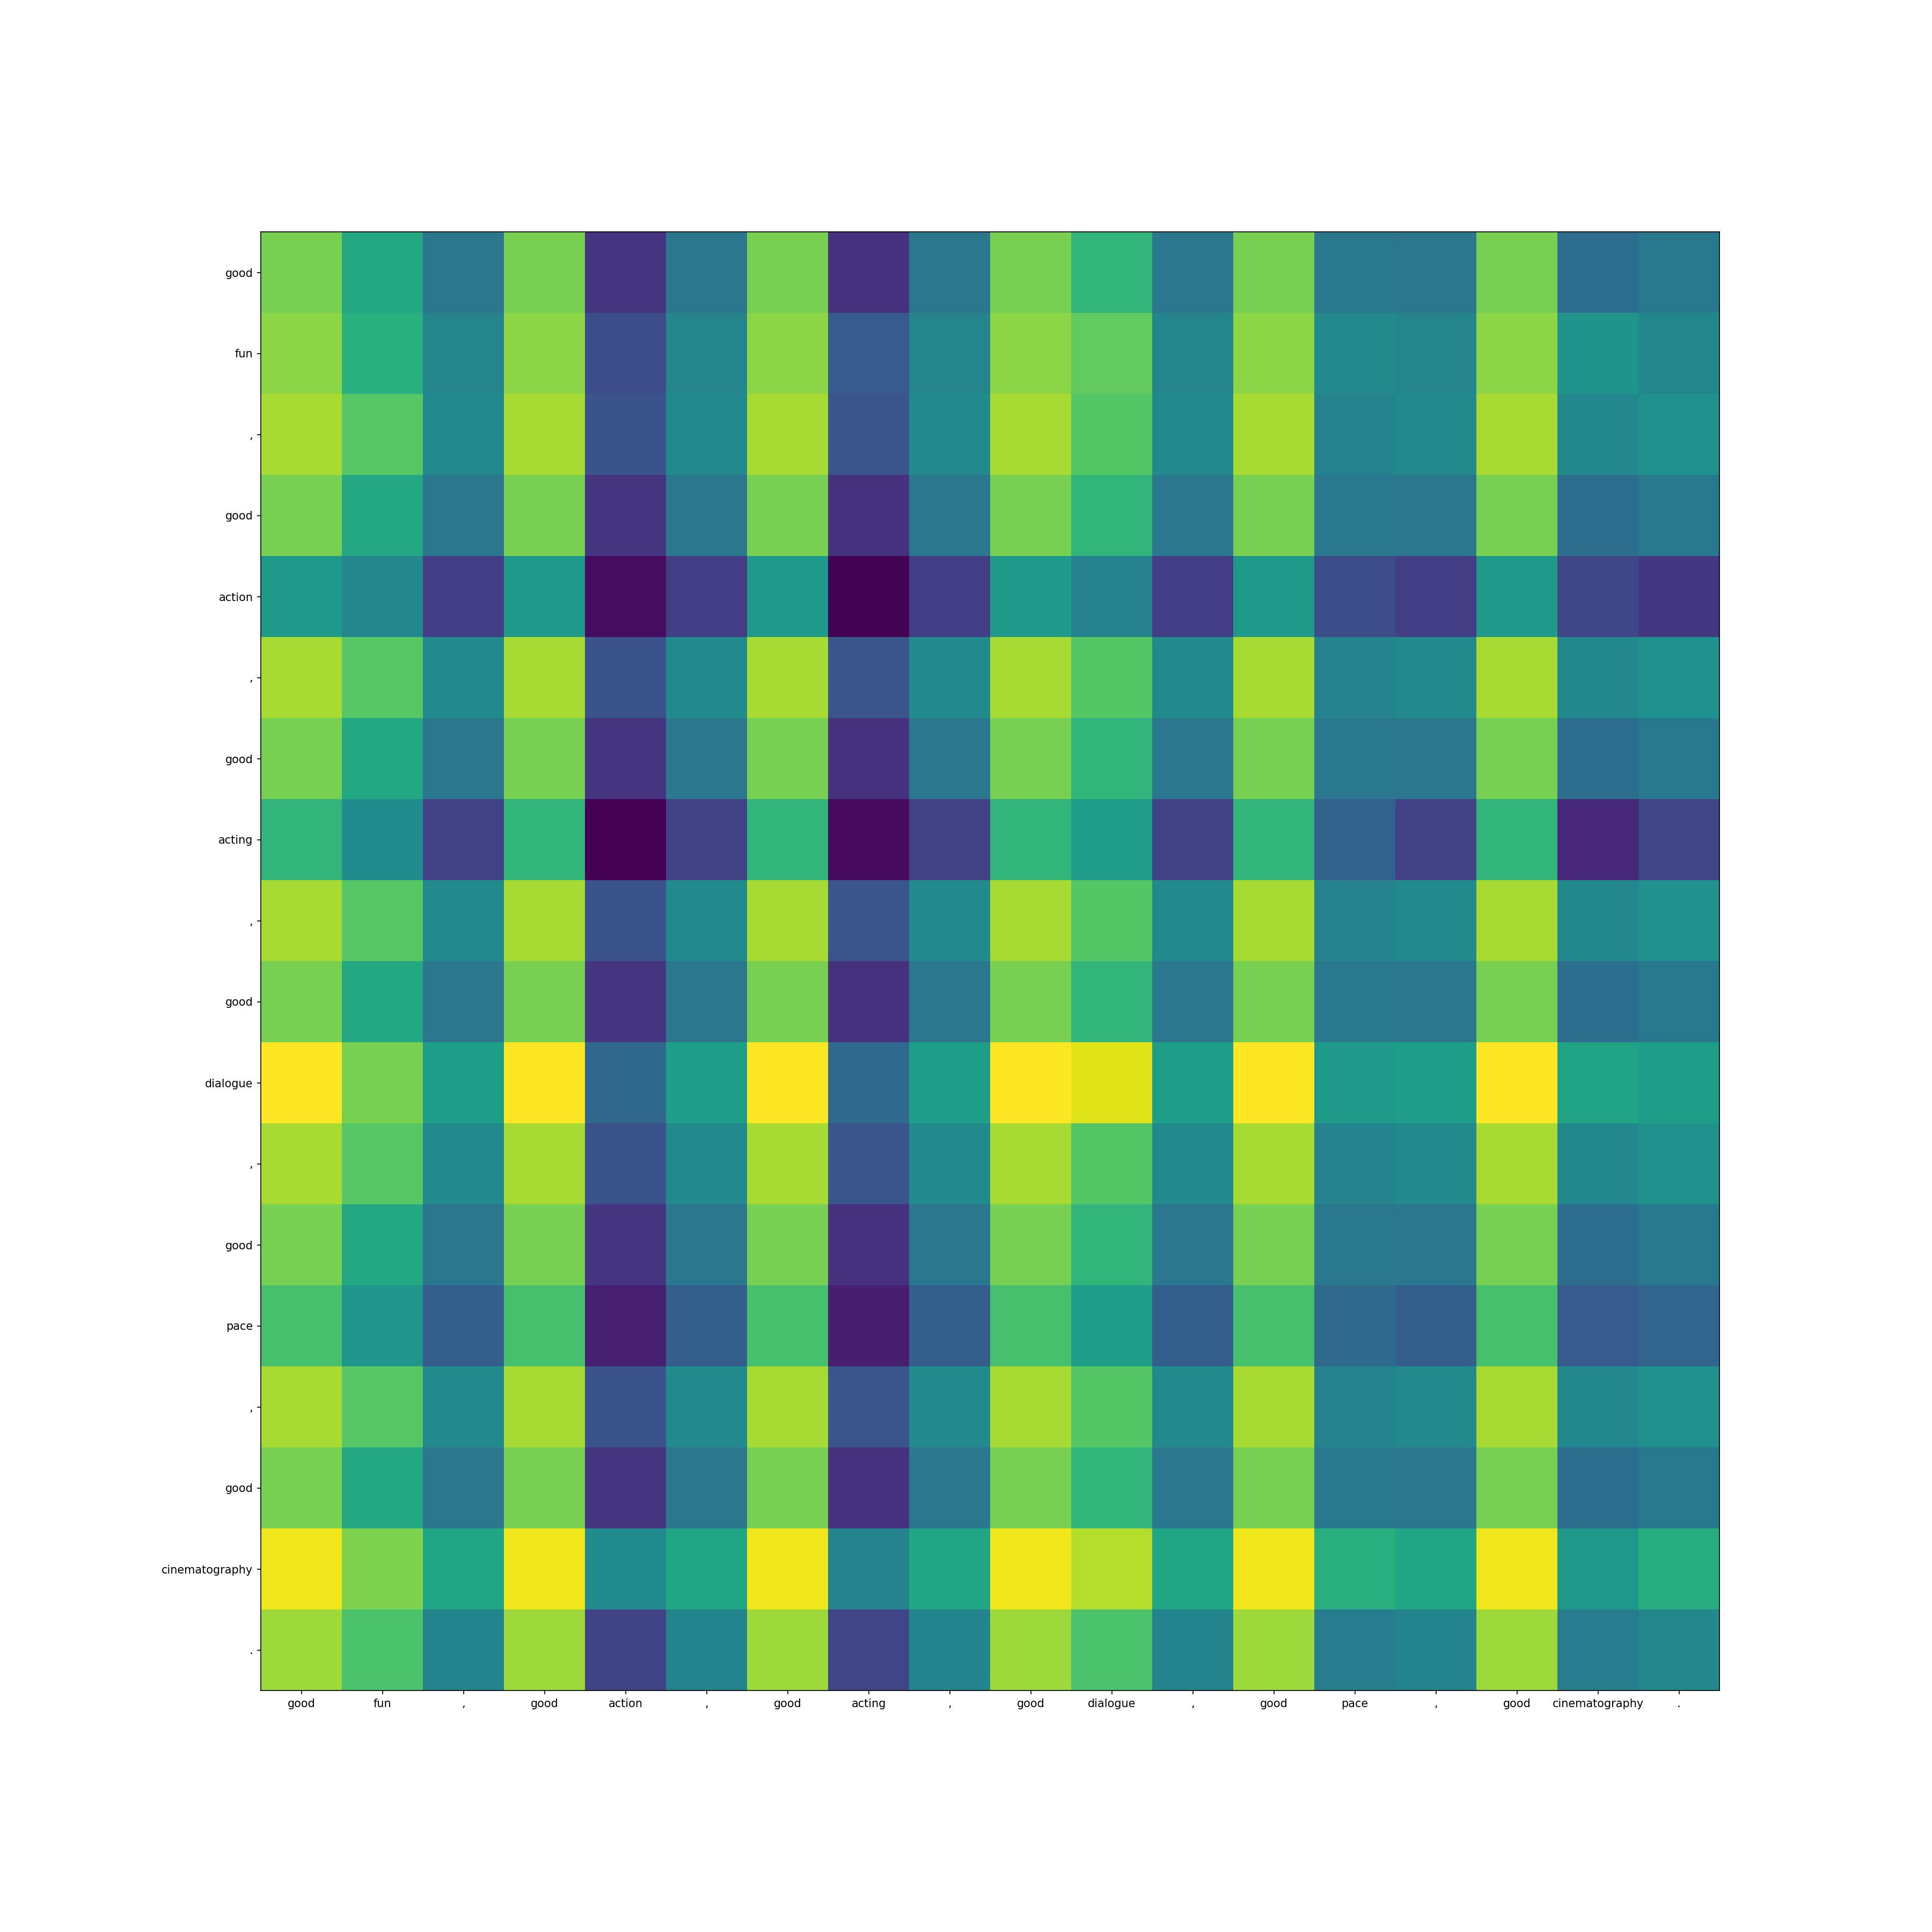
<!-- ![attention_very_positive.png]() -->

We can see, that the net decided, that the most important feature of the sentence to focus on would be the dialogue, and with it, it being **good**. this is interesting as a person would also focus on that feature to judge if a movie is good or not. besides that it associated fun, and more with it aswell. this was interesting to see.

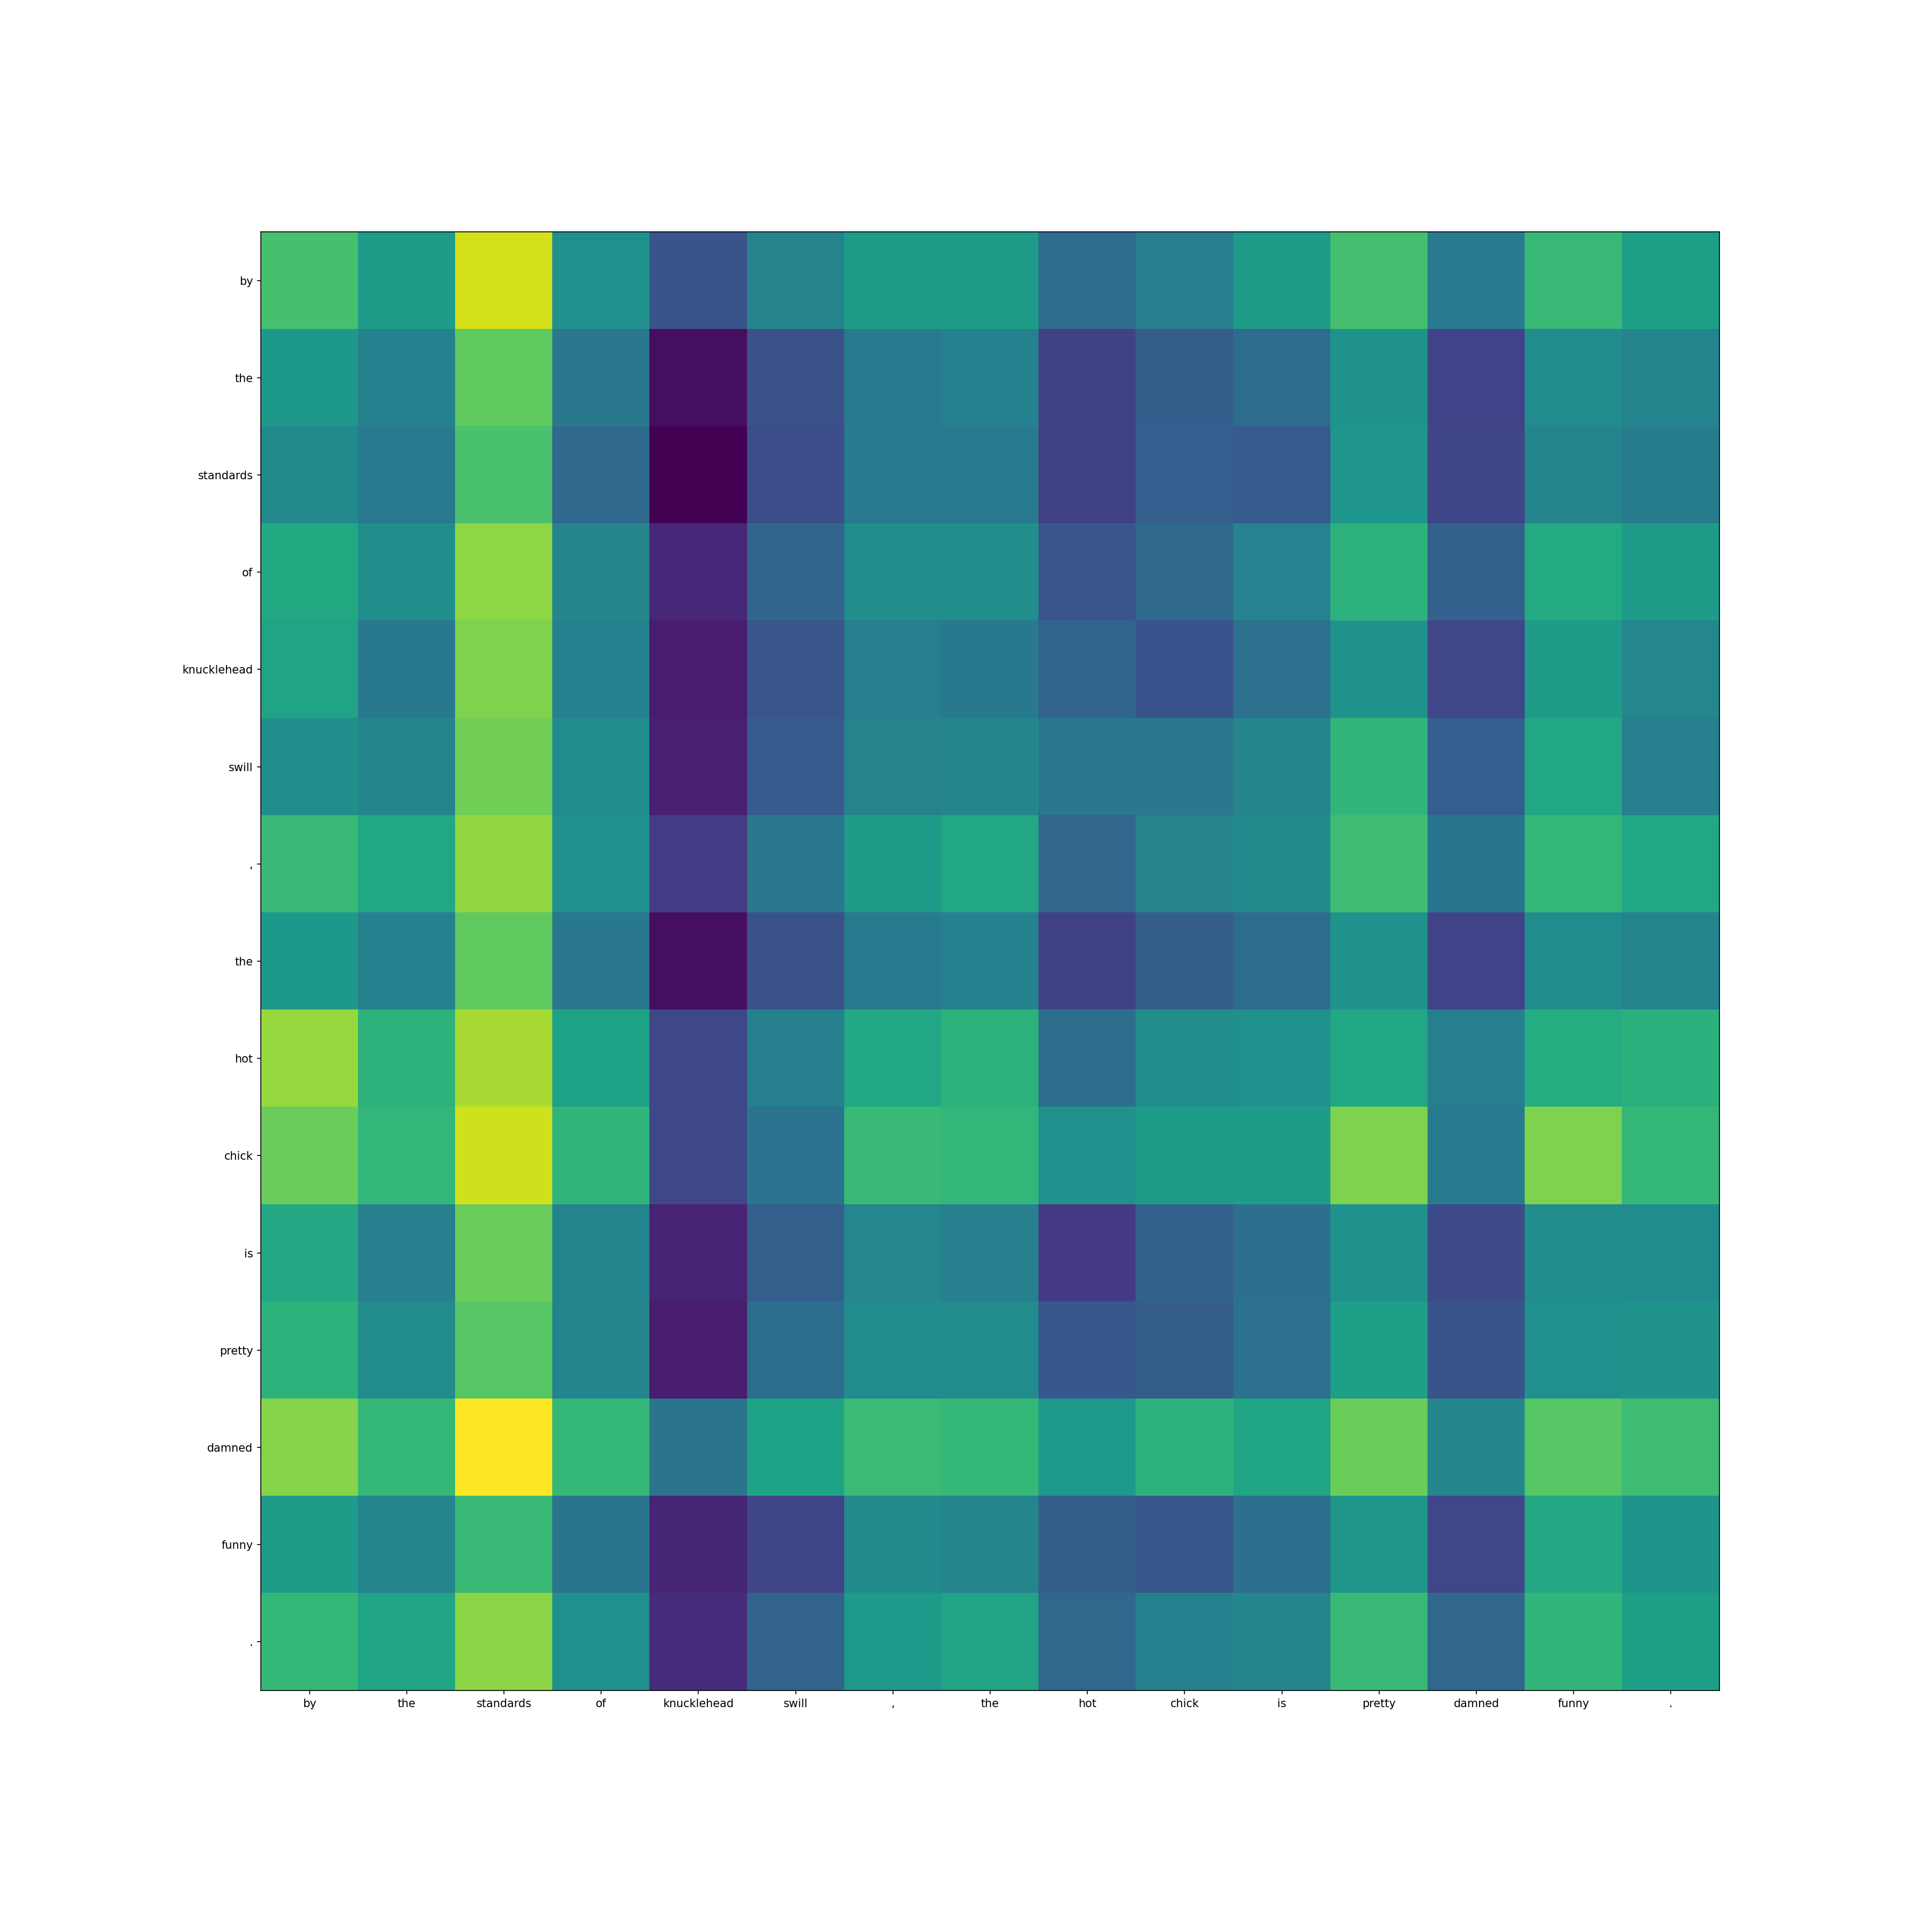

Another example of an attention map that shows what the network "saw" in the sentence.

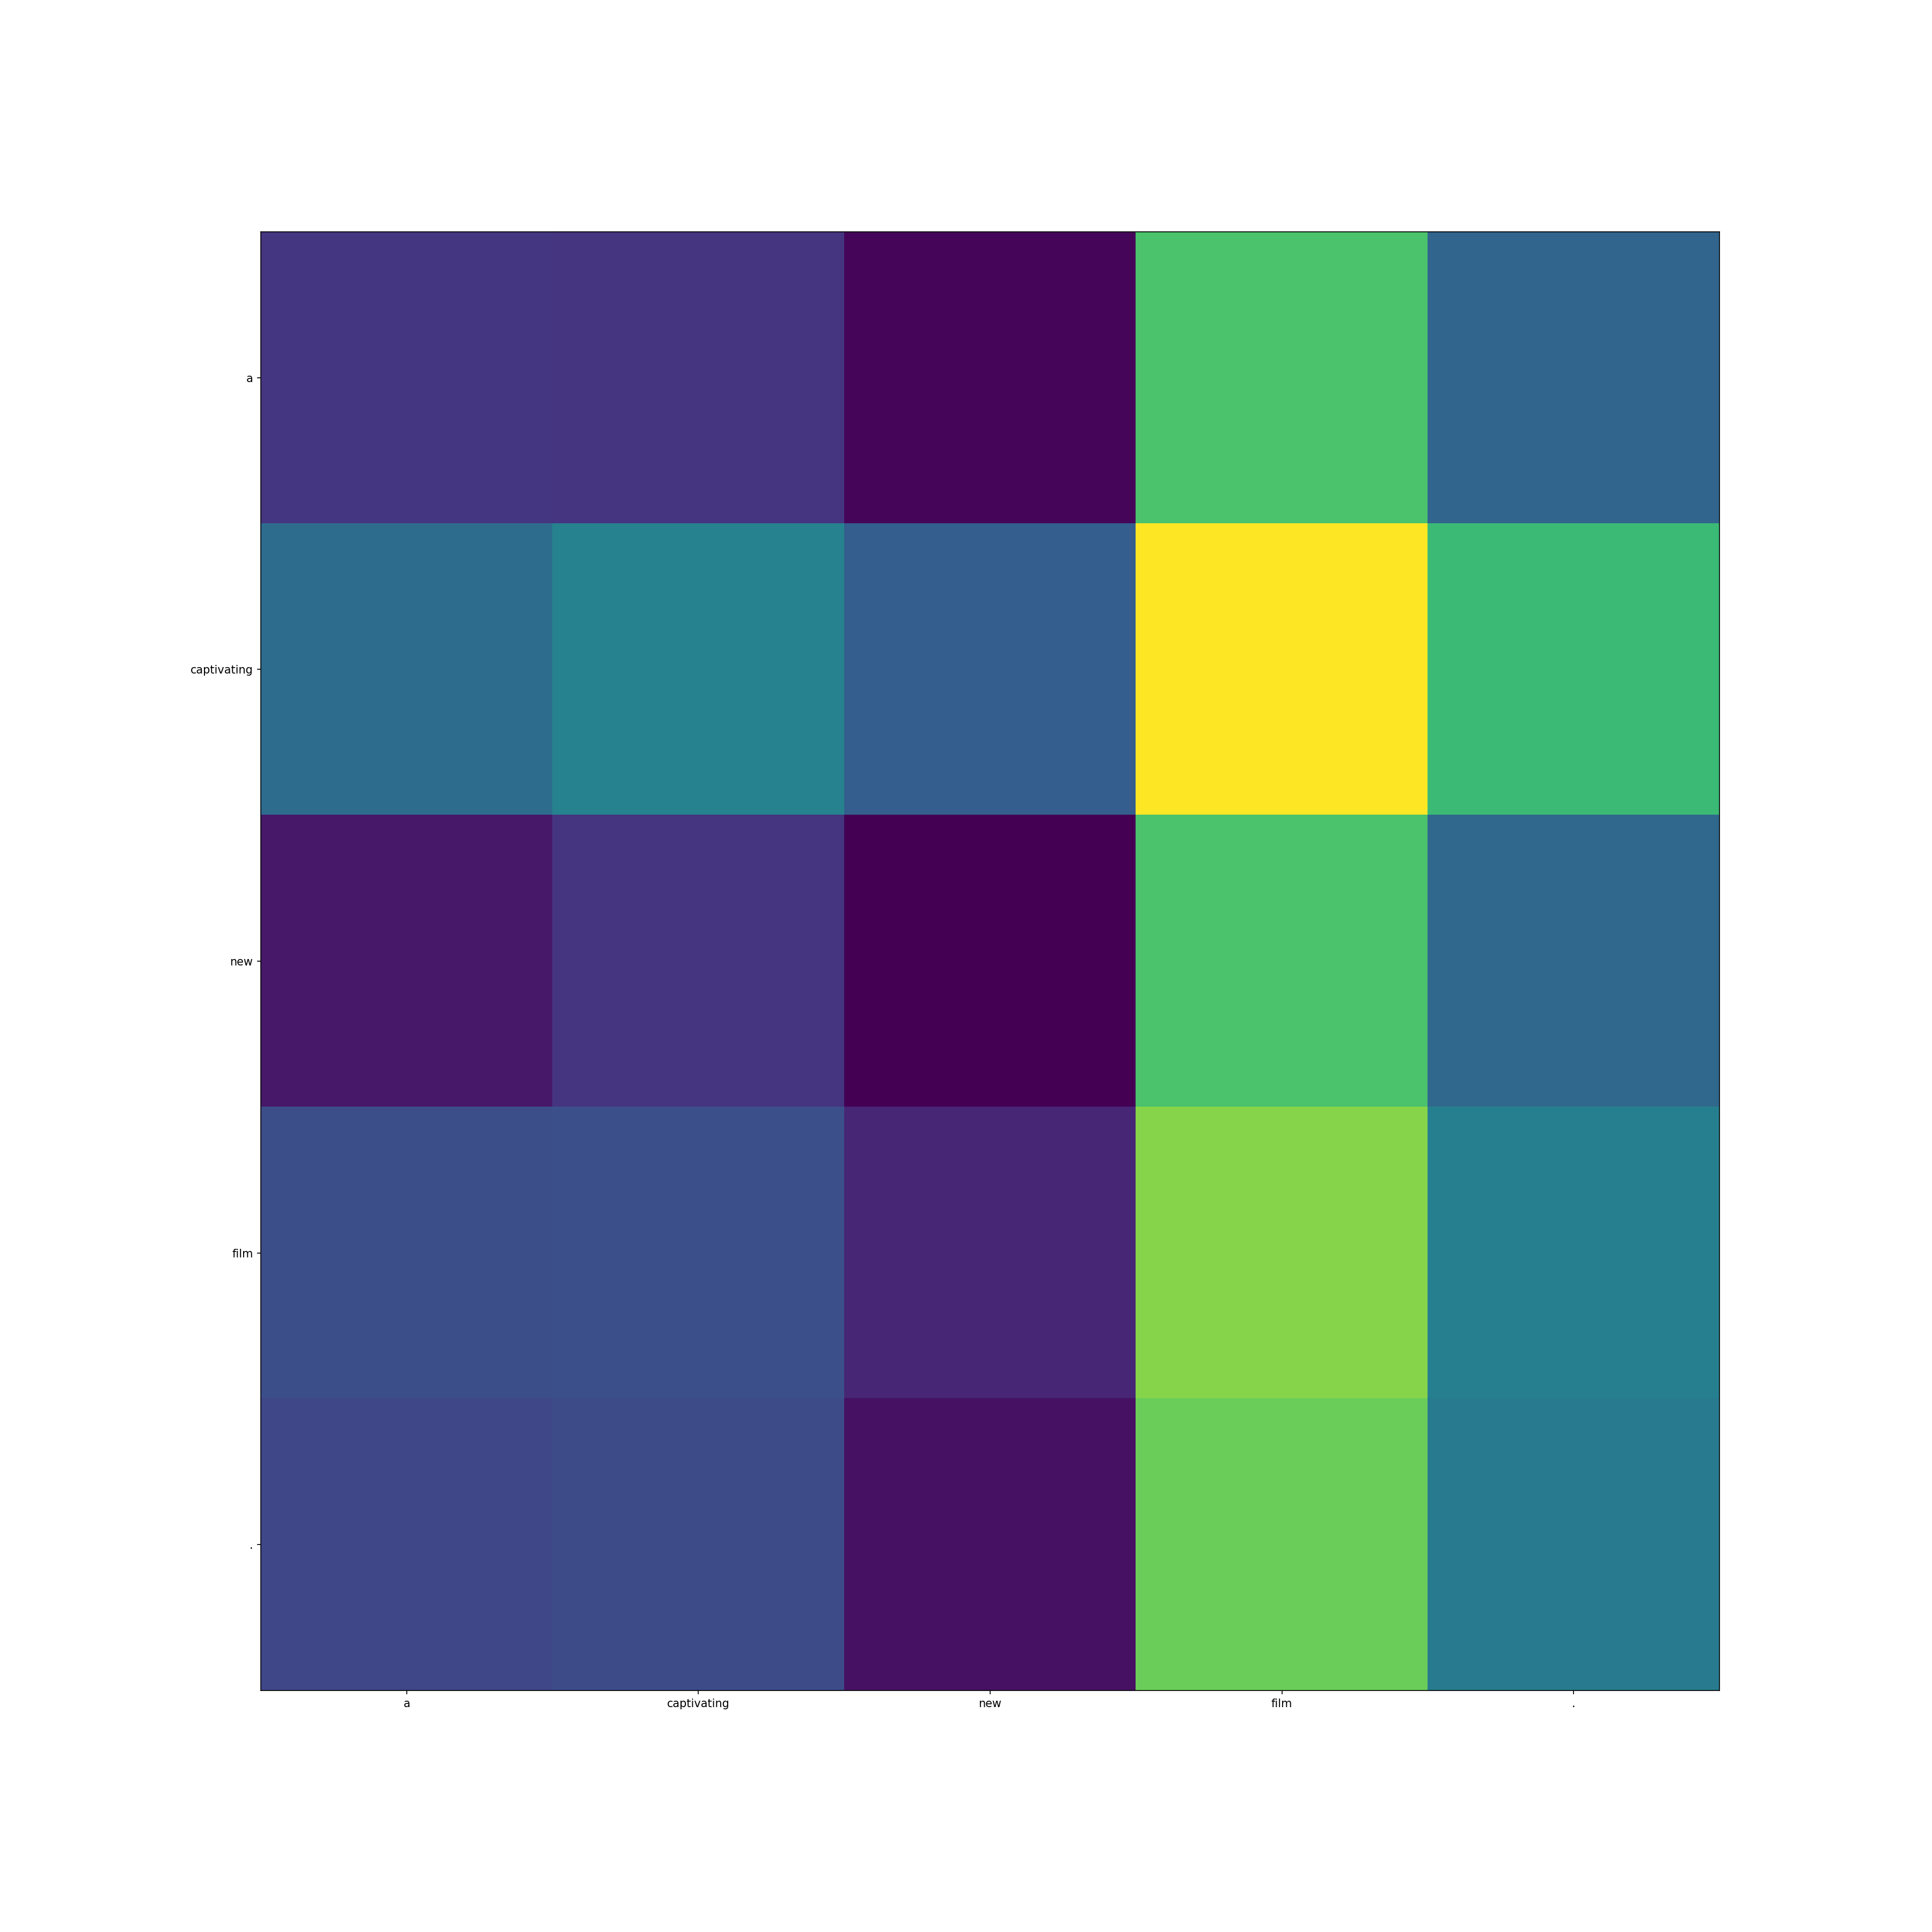

This is a great example of an attention map giving us a very insightful look to the net analysis of a sentance, and specifically, highlighting the advantage of an explainable model such as a self attention model. we can see the net saw the part of it being a captivating film, as **much** more important than every other part of the sentence.

#### Positive

1 | 2
- | - 
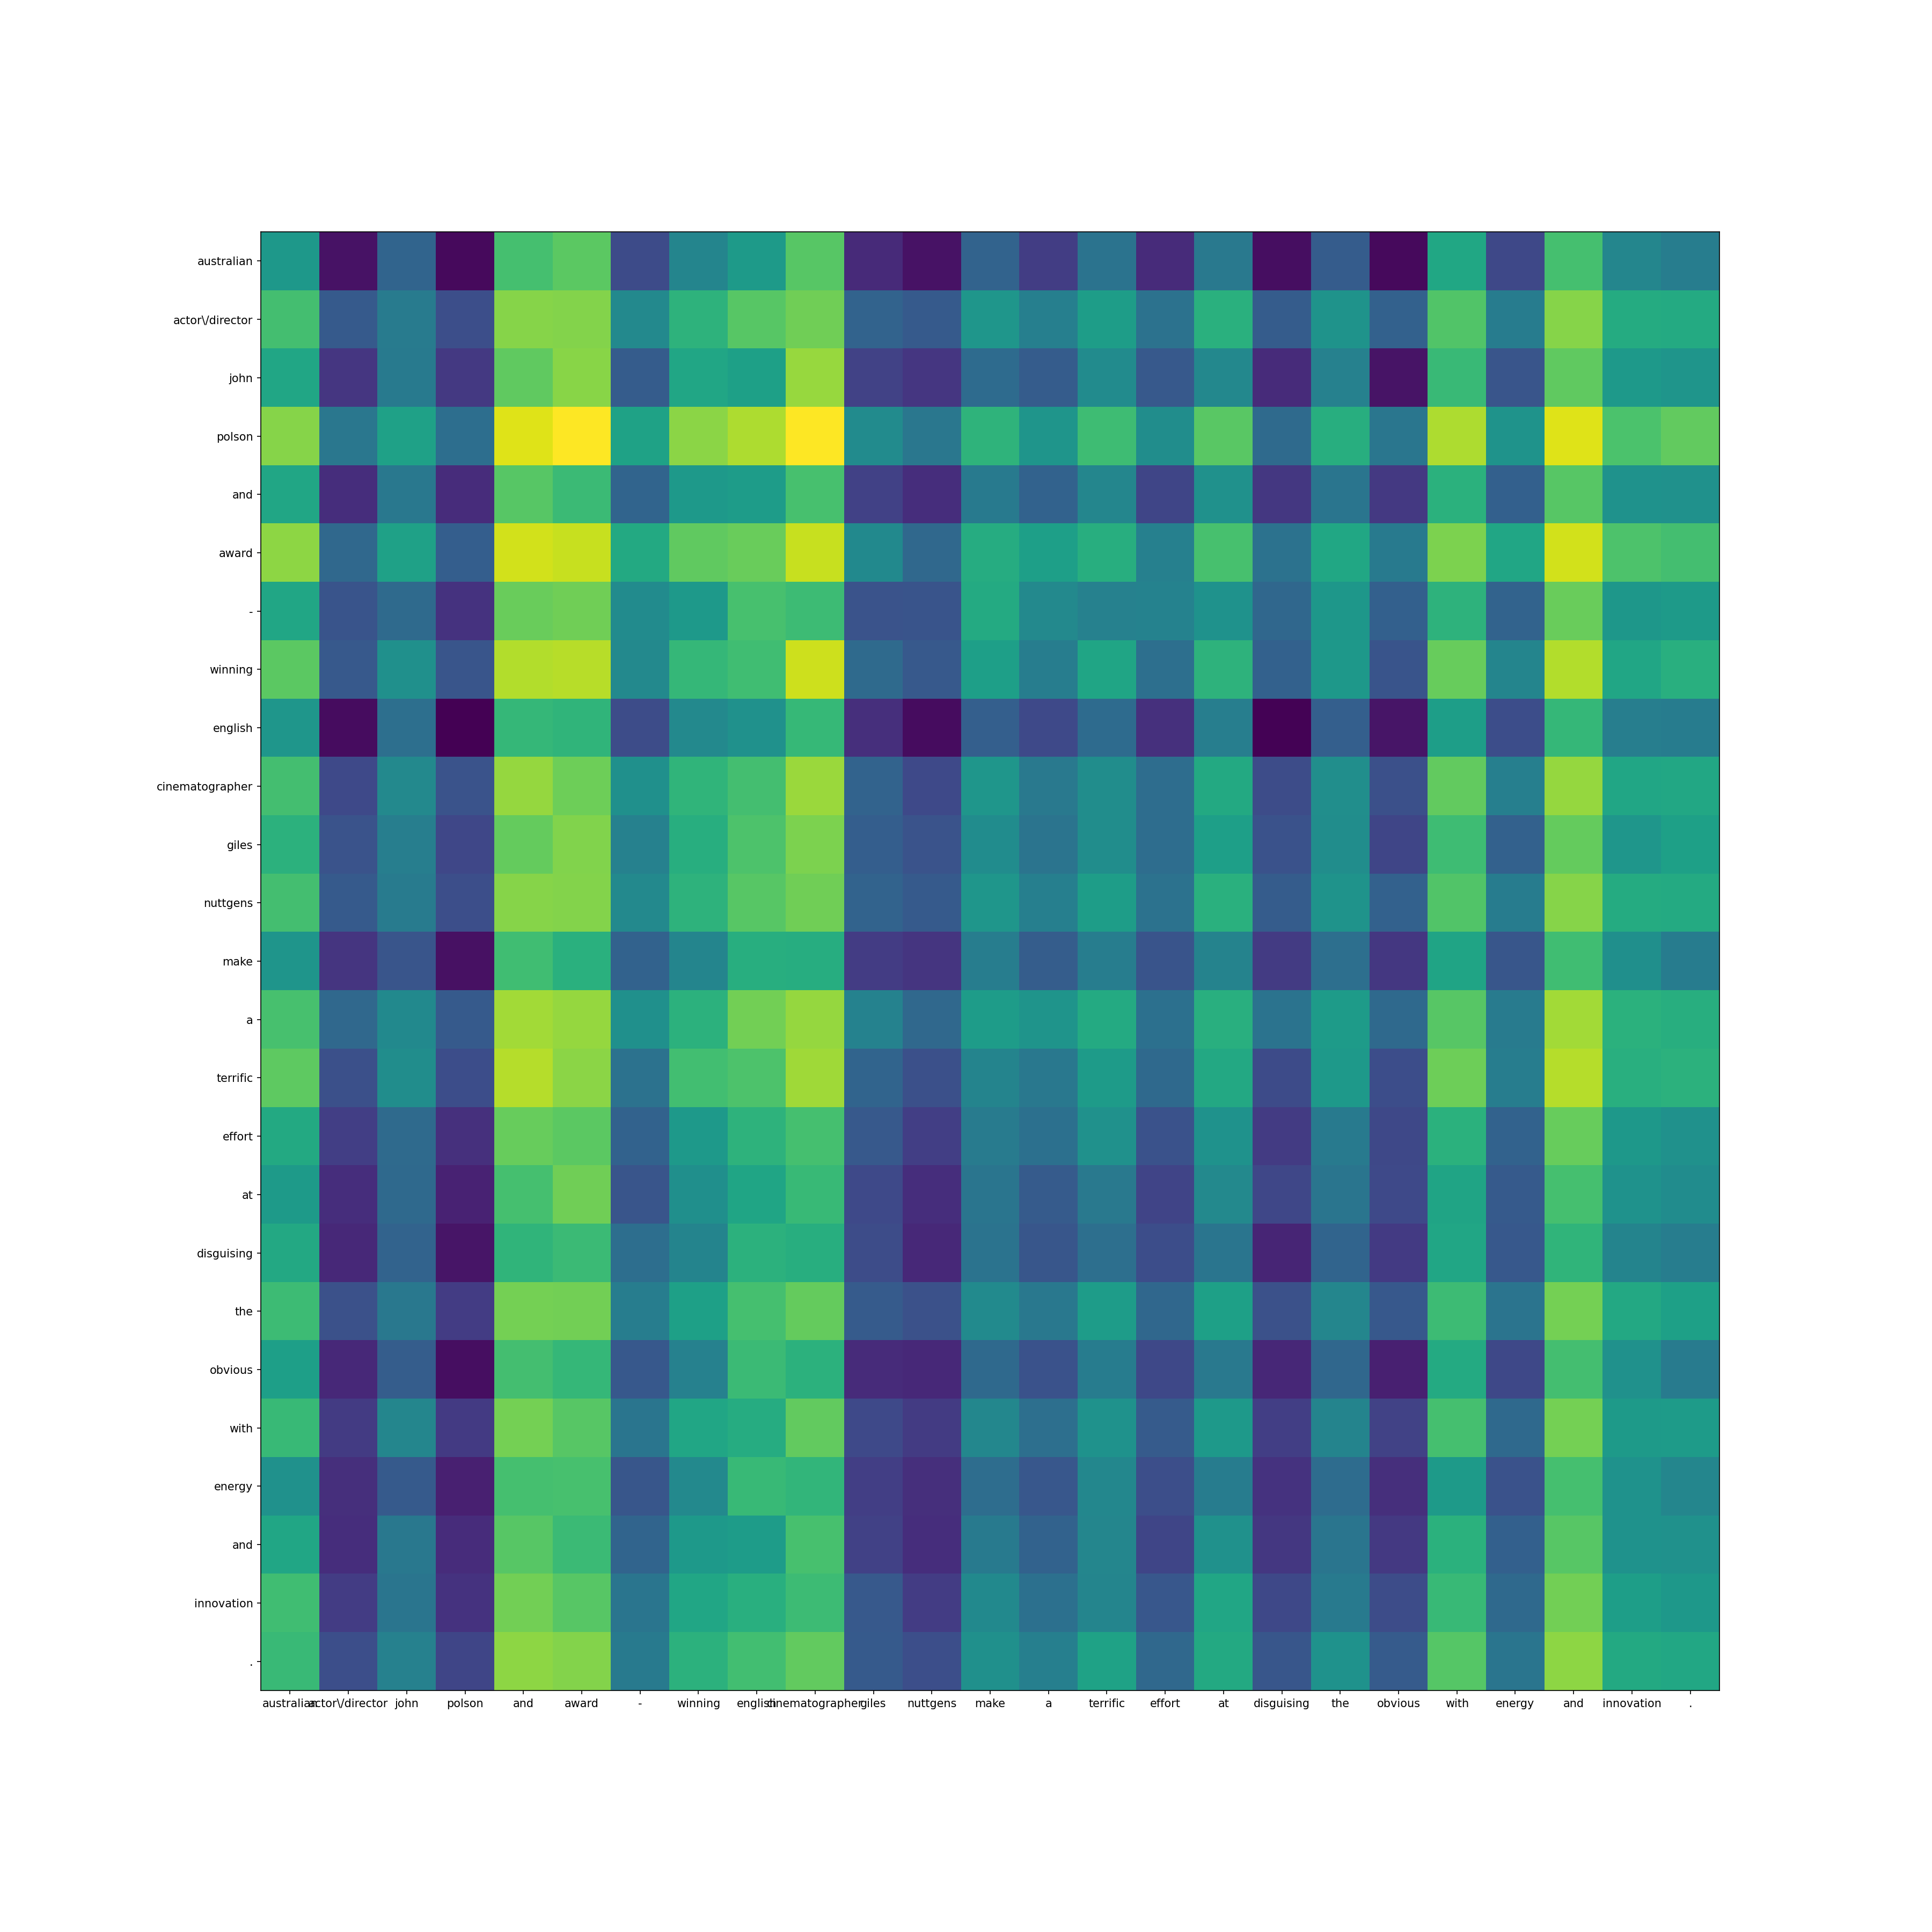 | 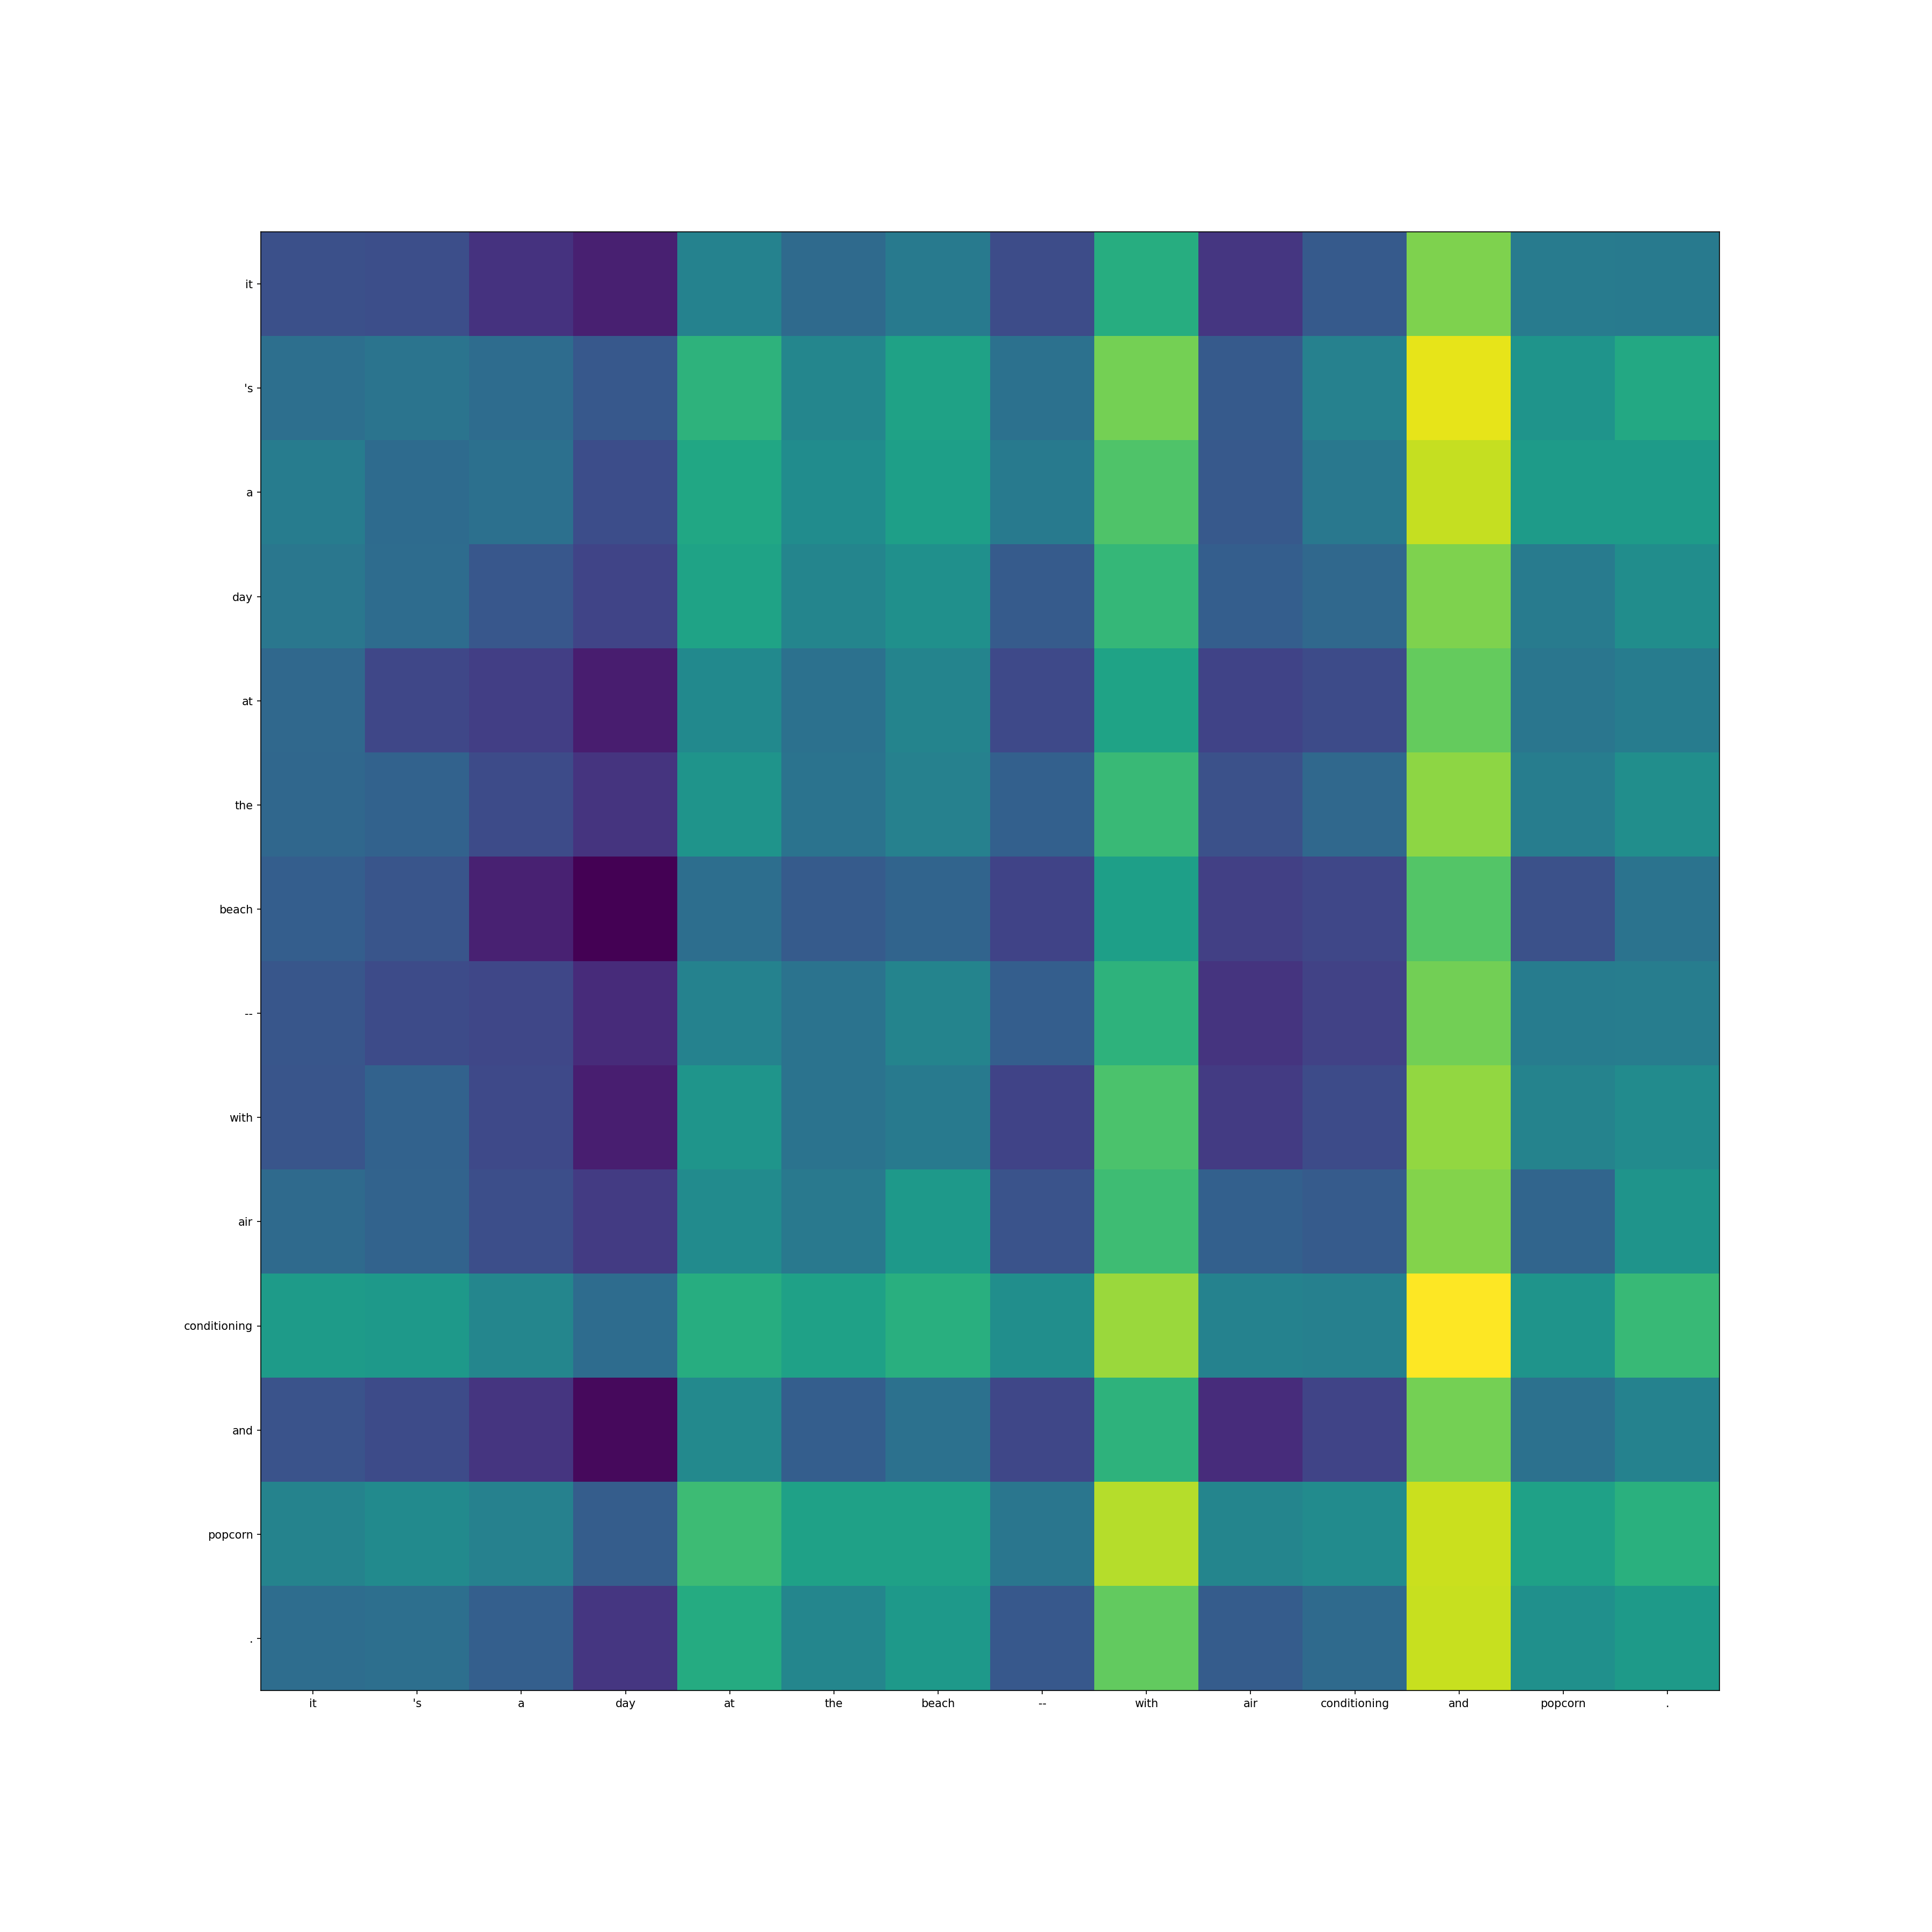

Here 2 attention maps of a positive review that don't show anything very interesting about the net (but are pretty to look at).
they're attached in the assets.

#### Neutral

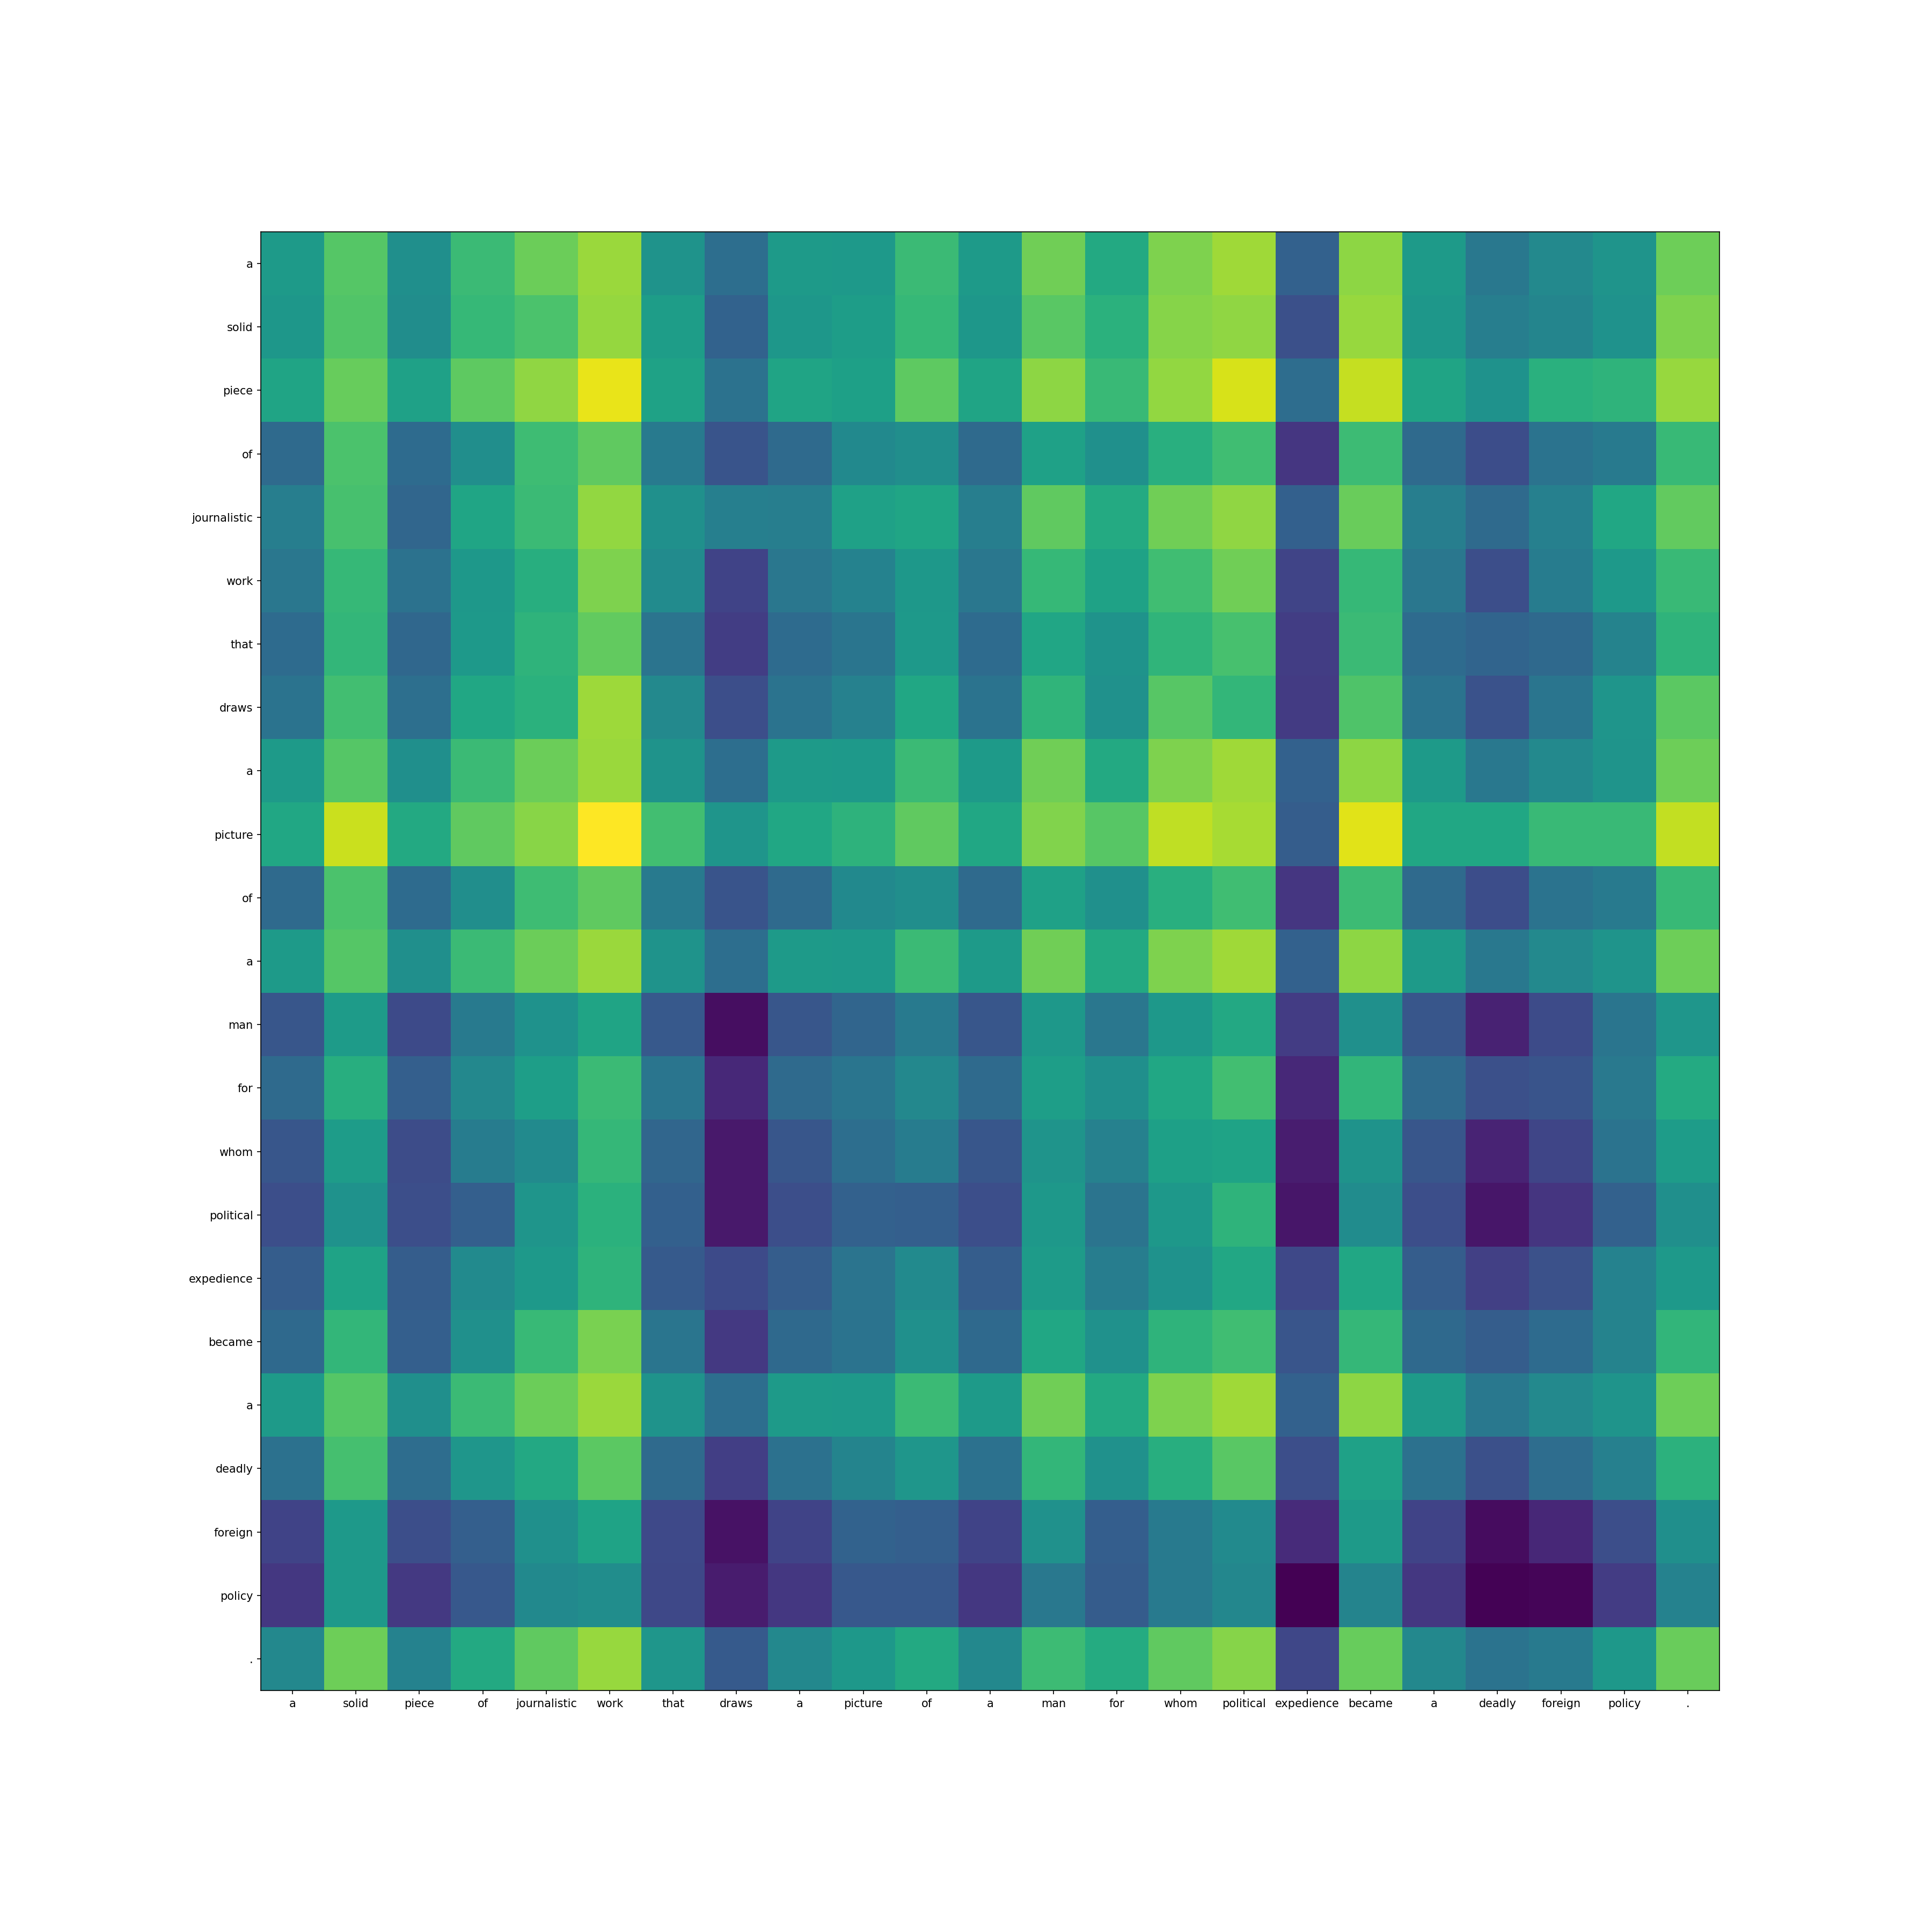

Here in the neutral review, we can't see any special focuses to work on, besides the picture(standing for movie in this case) being solid, and a work. this result is probably a result of our net not being able to train very well just yet and **understand** high level features well enough.

#### Negative

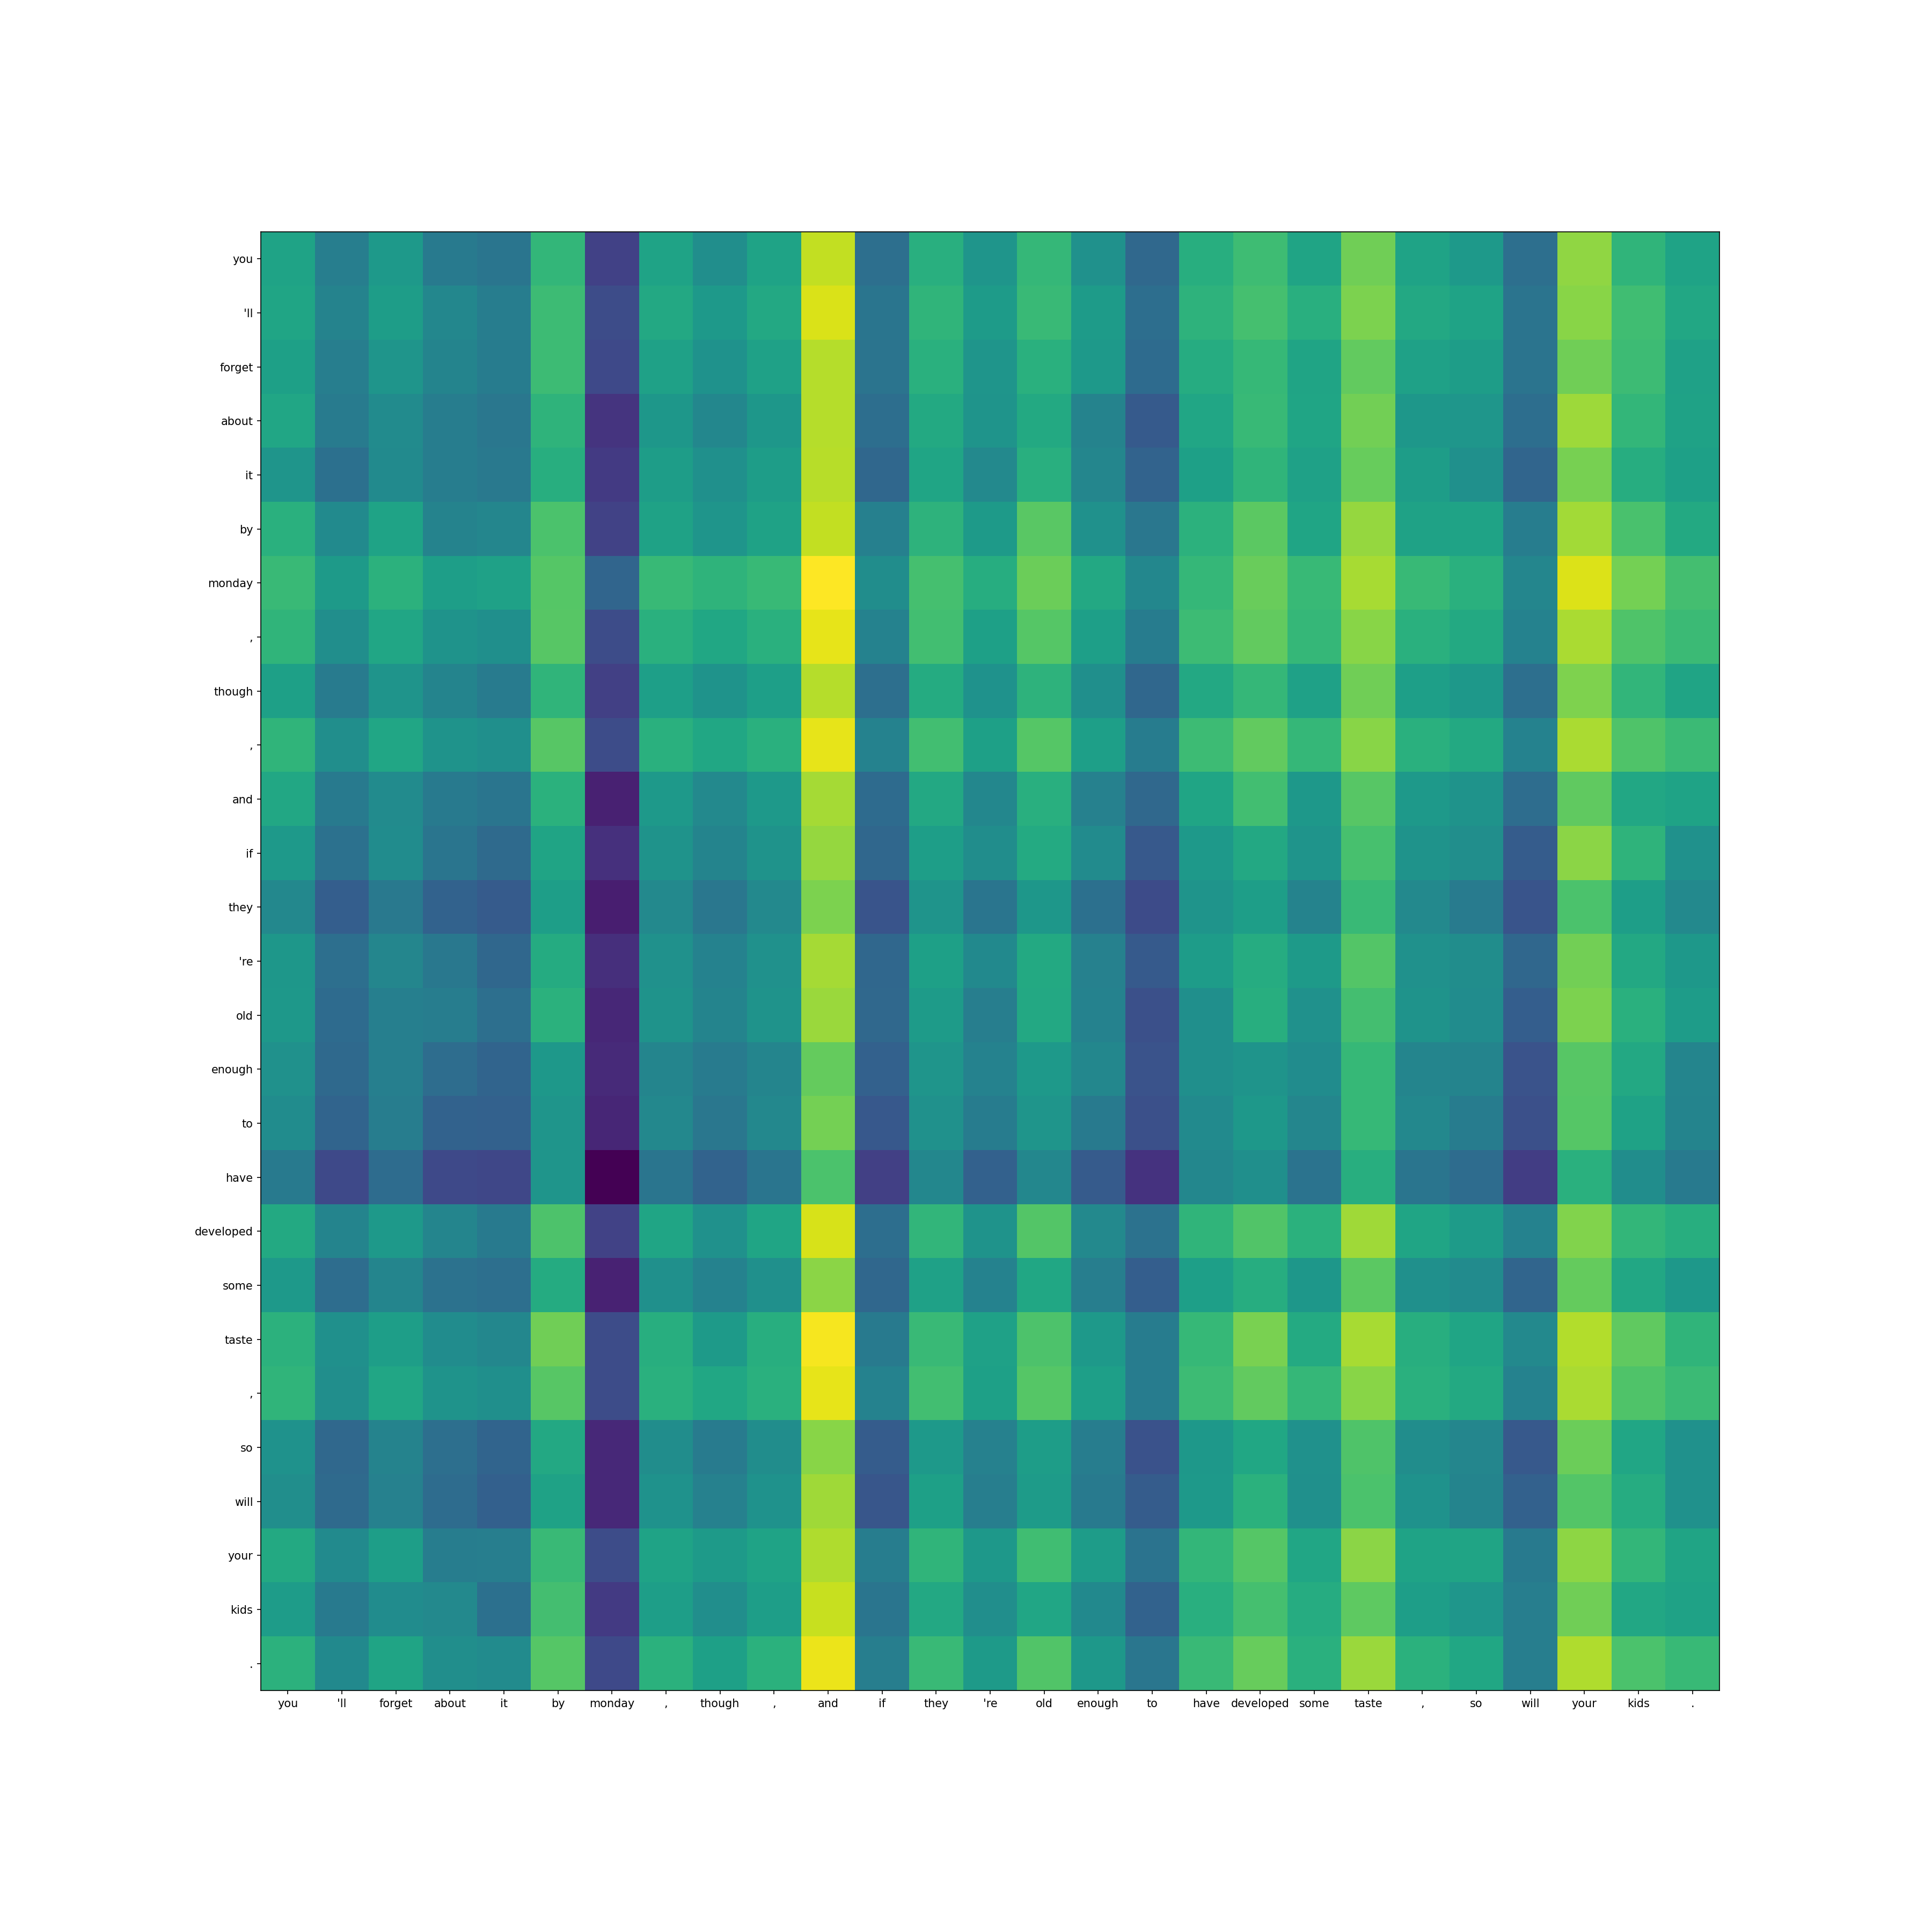

This here is the prime example of the defficiencies in our net. it focused on the word and, and associated each word with the word **and** **HEAVILY**. this means the net saw the word And a lot in reviews that were tilting, and therefore, tagged it as very important to focus on. this is a weakness in our net architecture, or in our being able to combine it and get rid of connecting words well enough. this might be an issue with the embedding aswell, seeing as it associated a semantic similarity with every word, seeing it was **near** any other one, though about this we are not sure.

1 | 2
- | - 
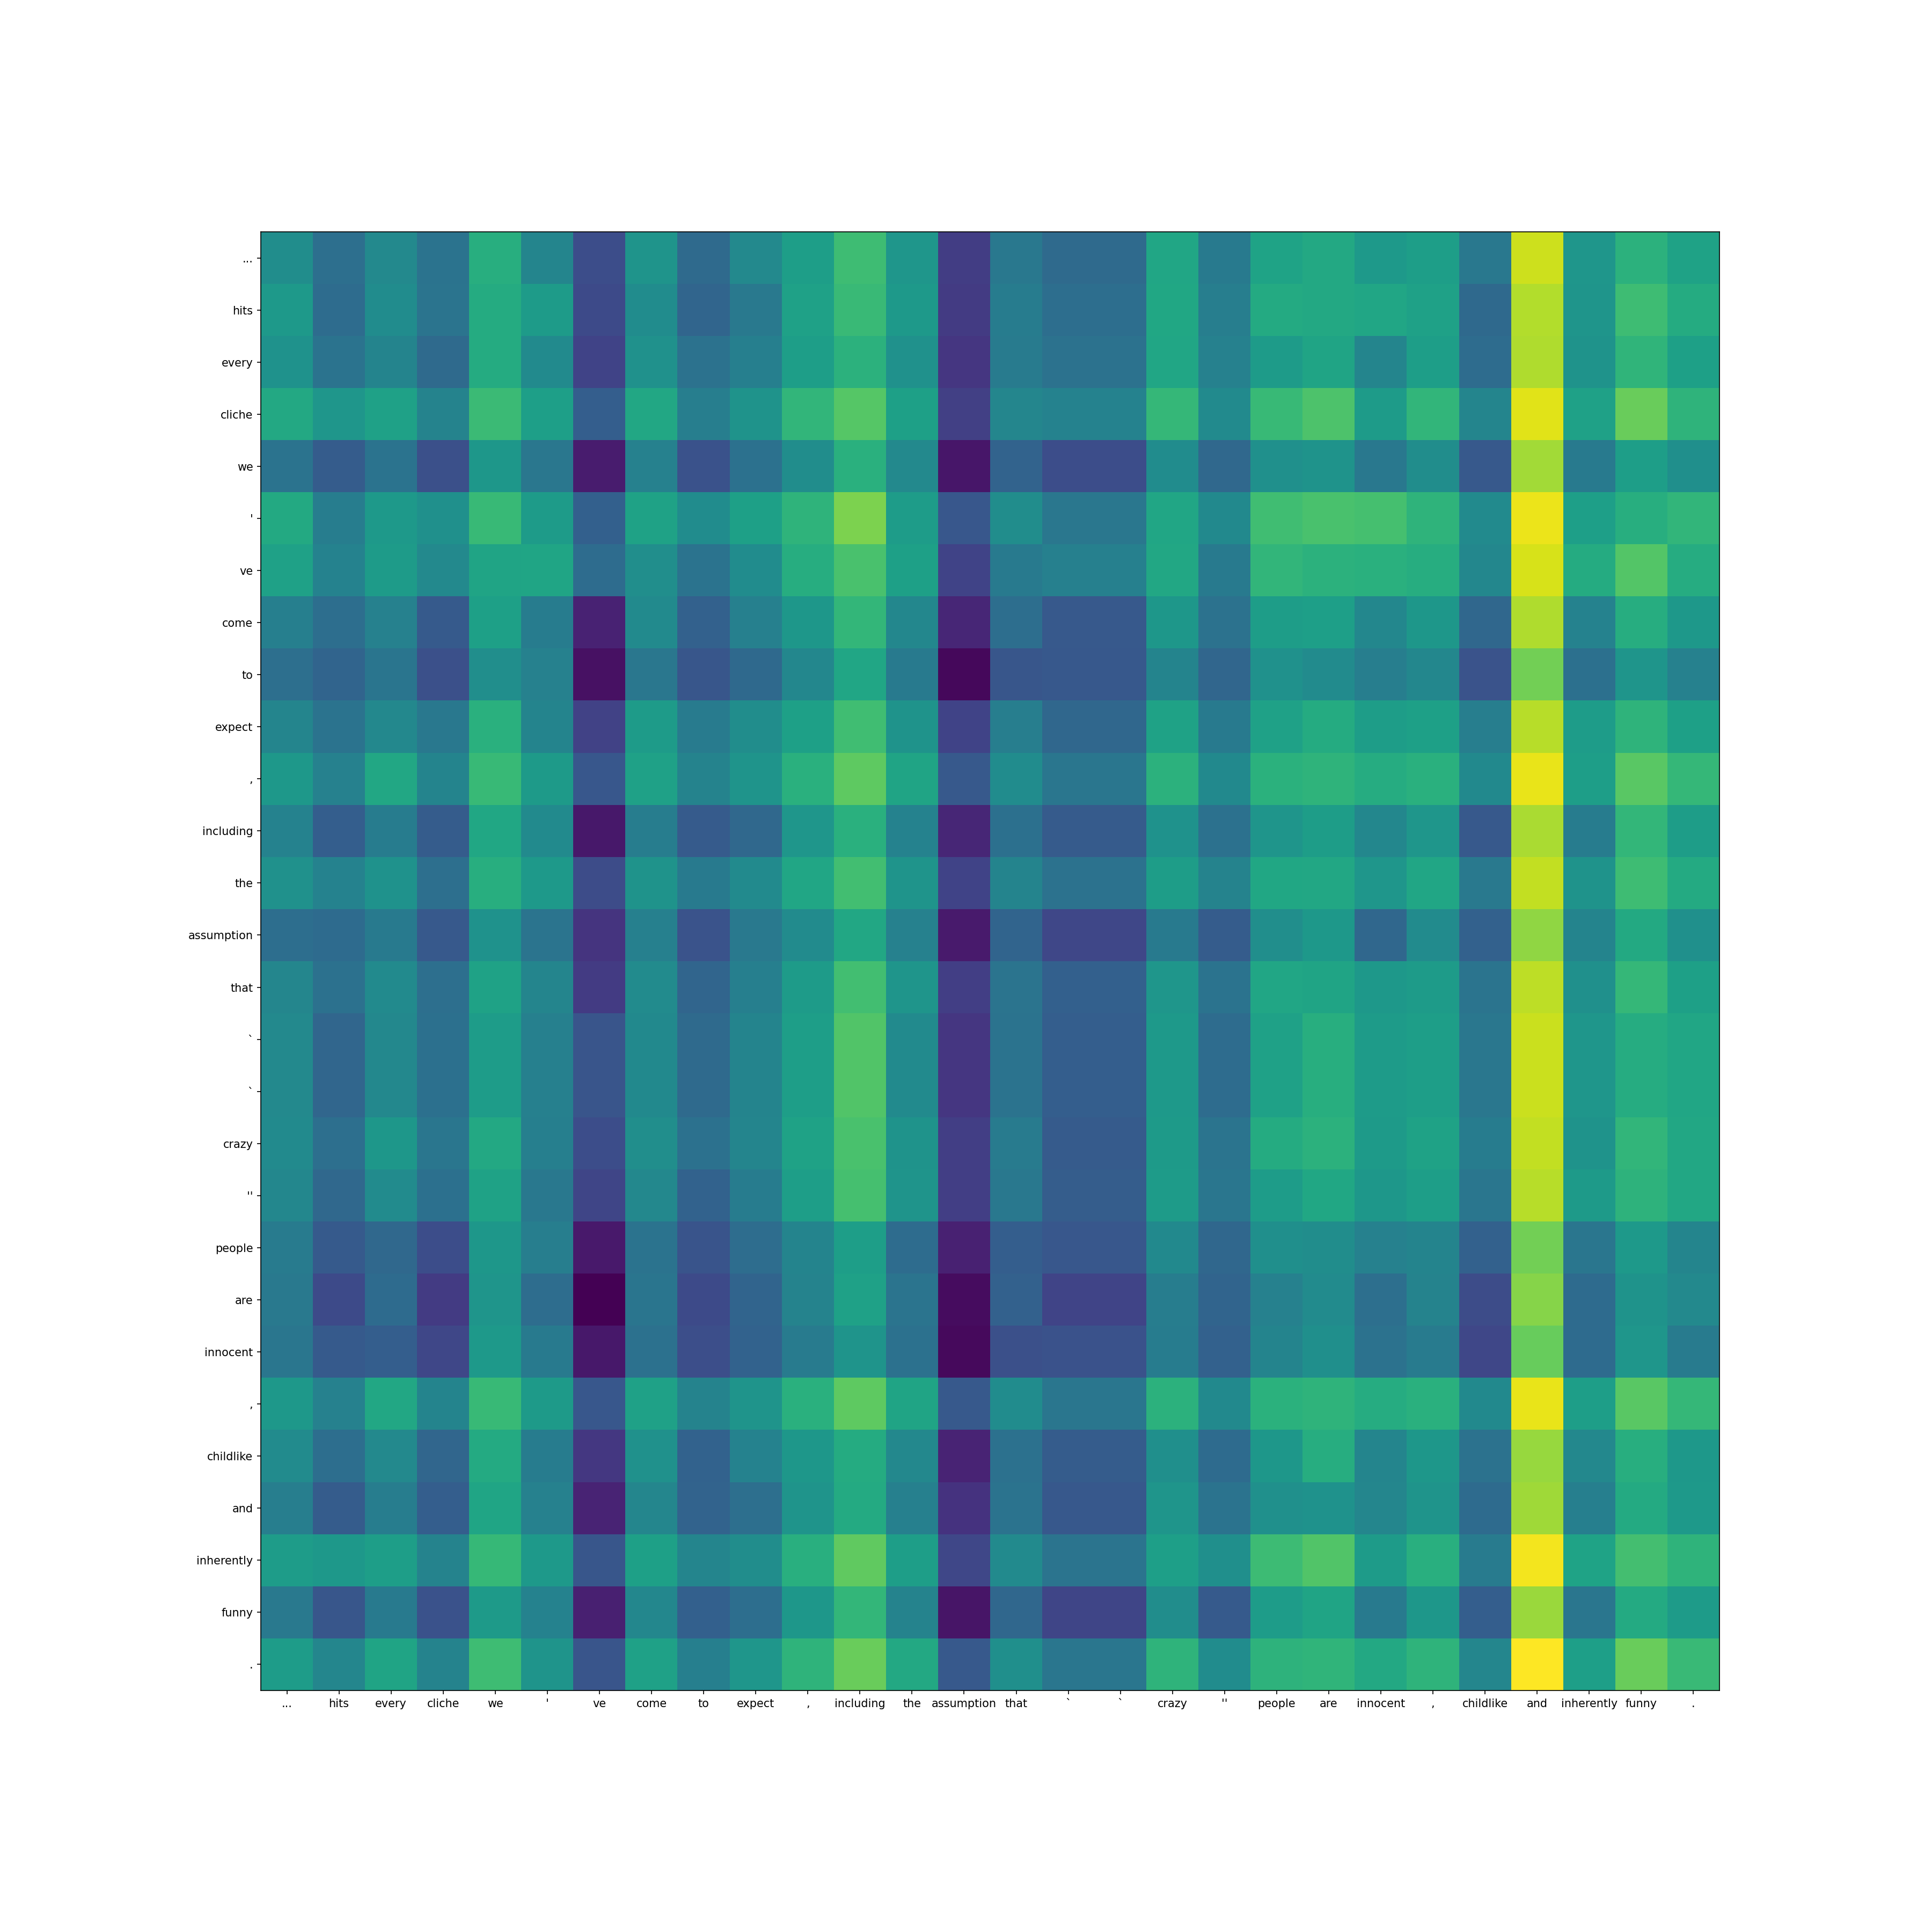 | 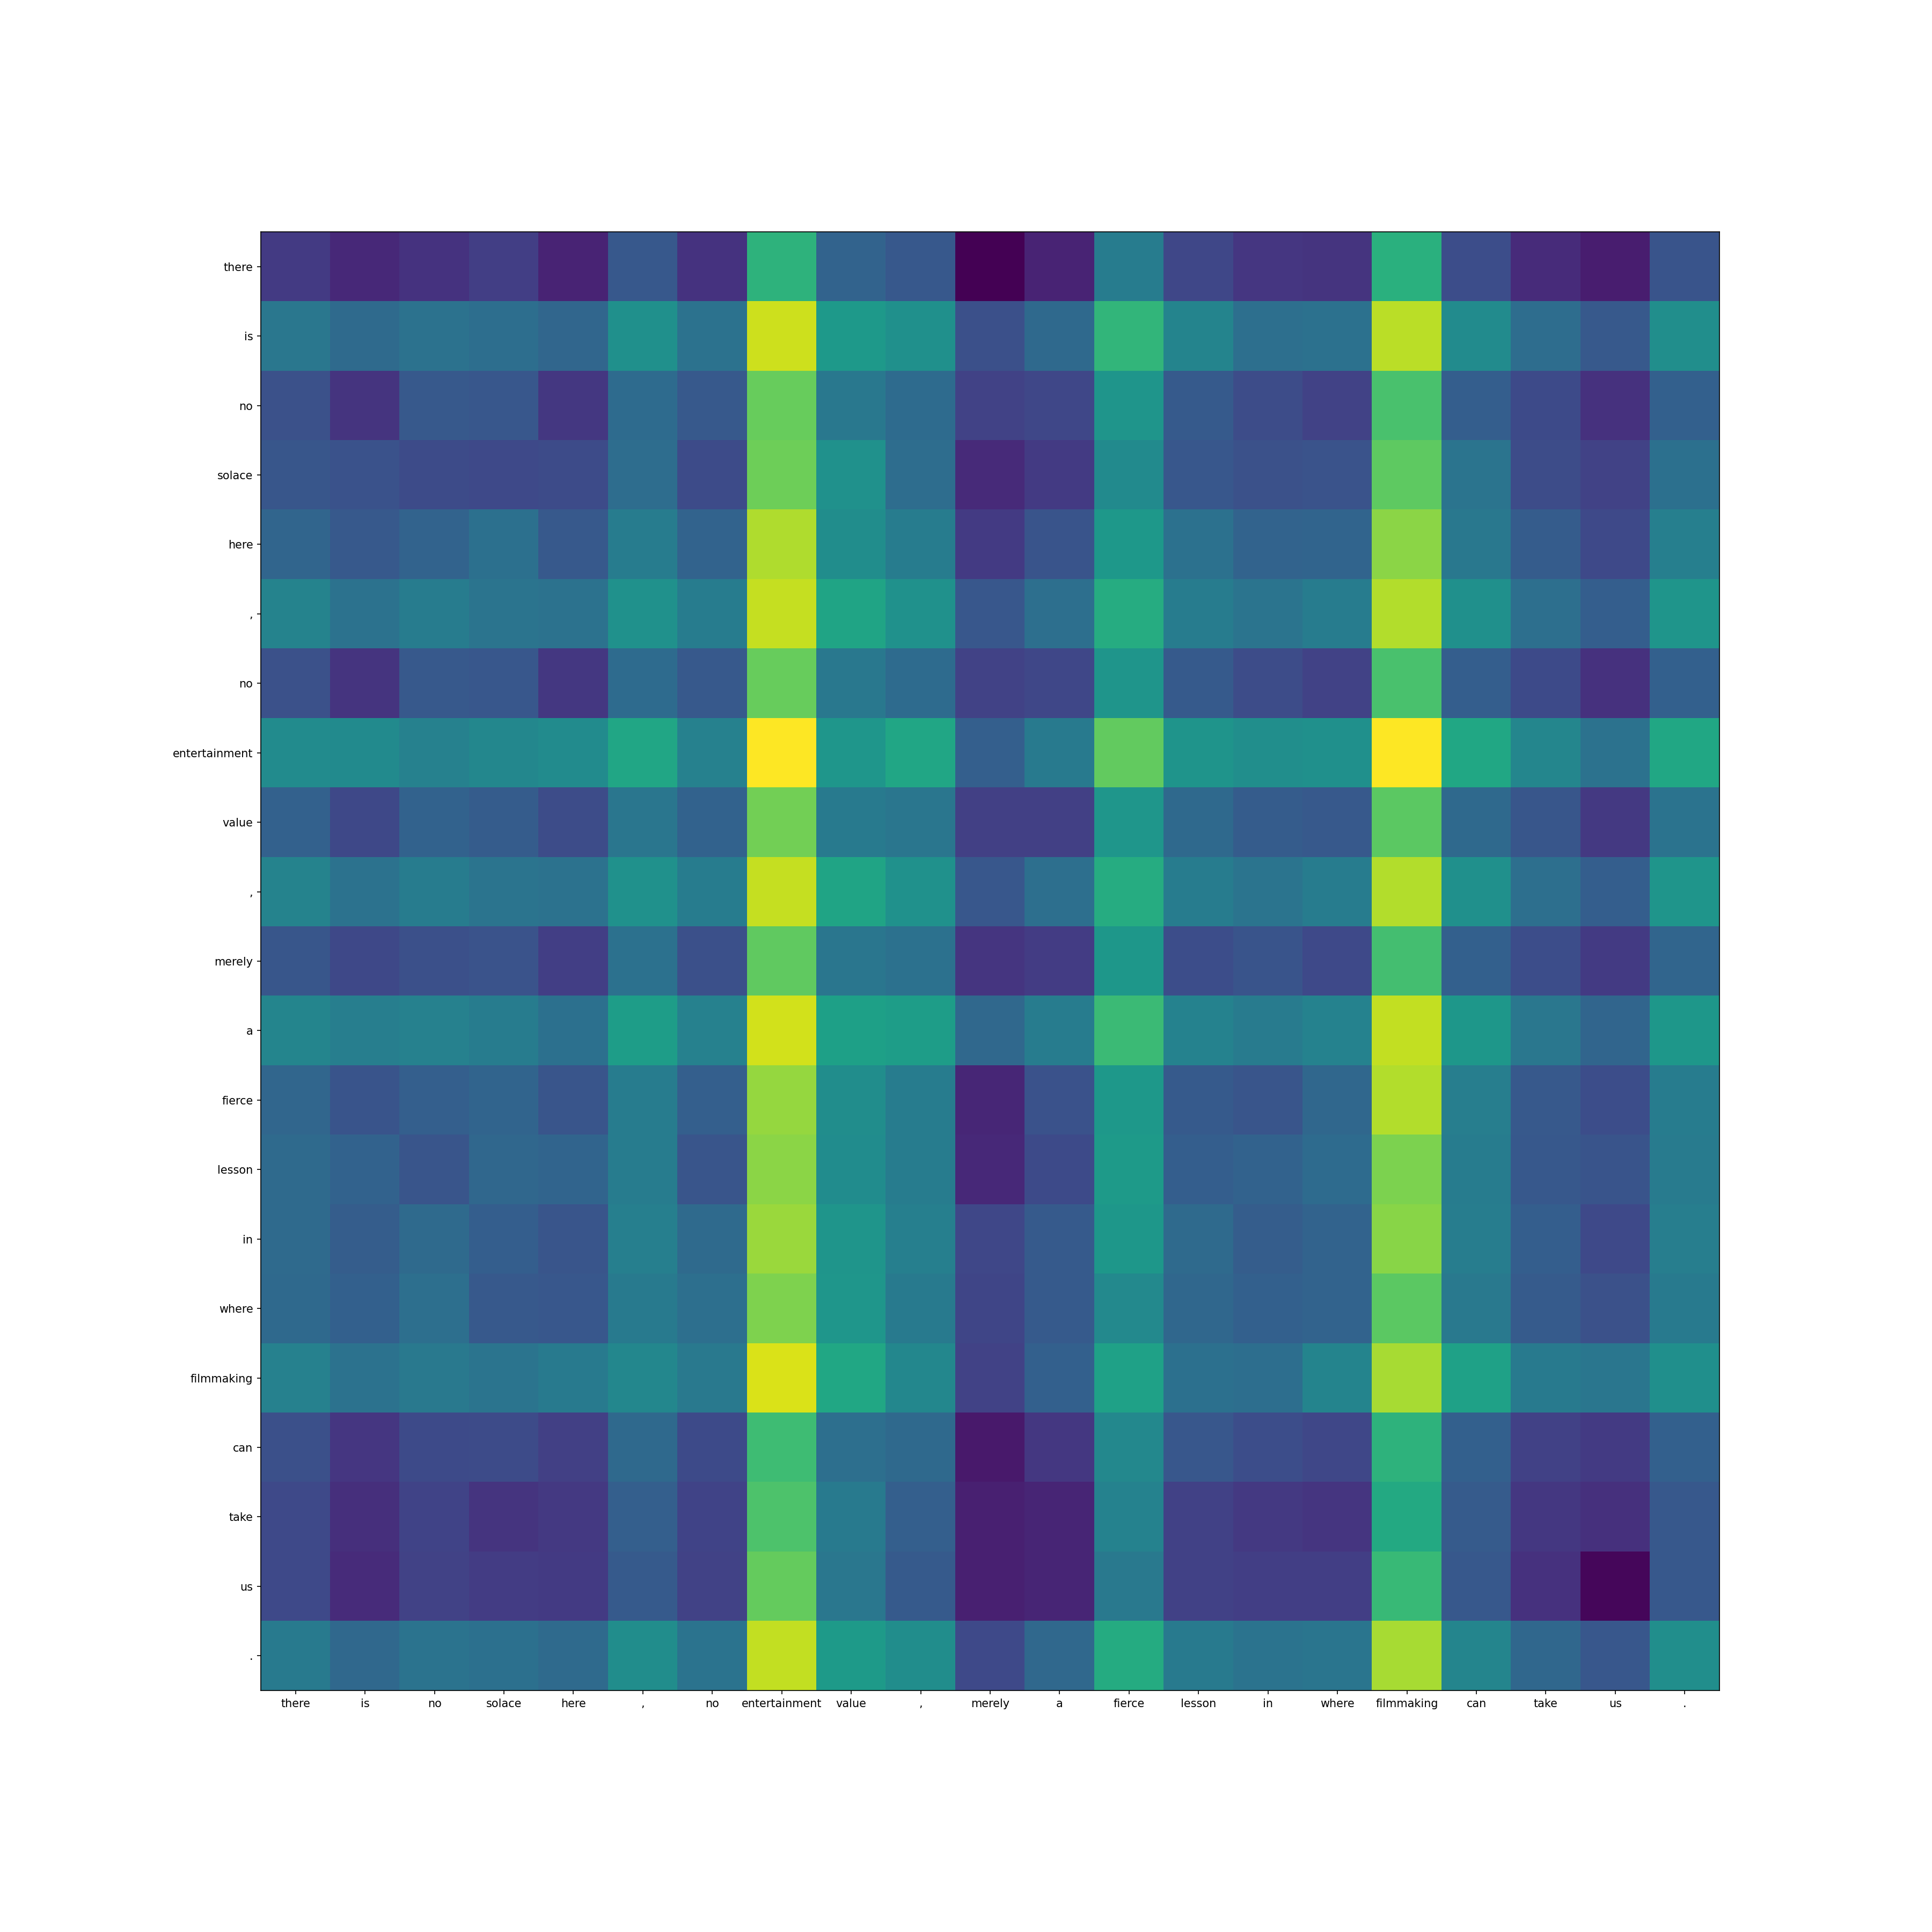

#### Very Negative

1 | 2
- | - 
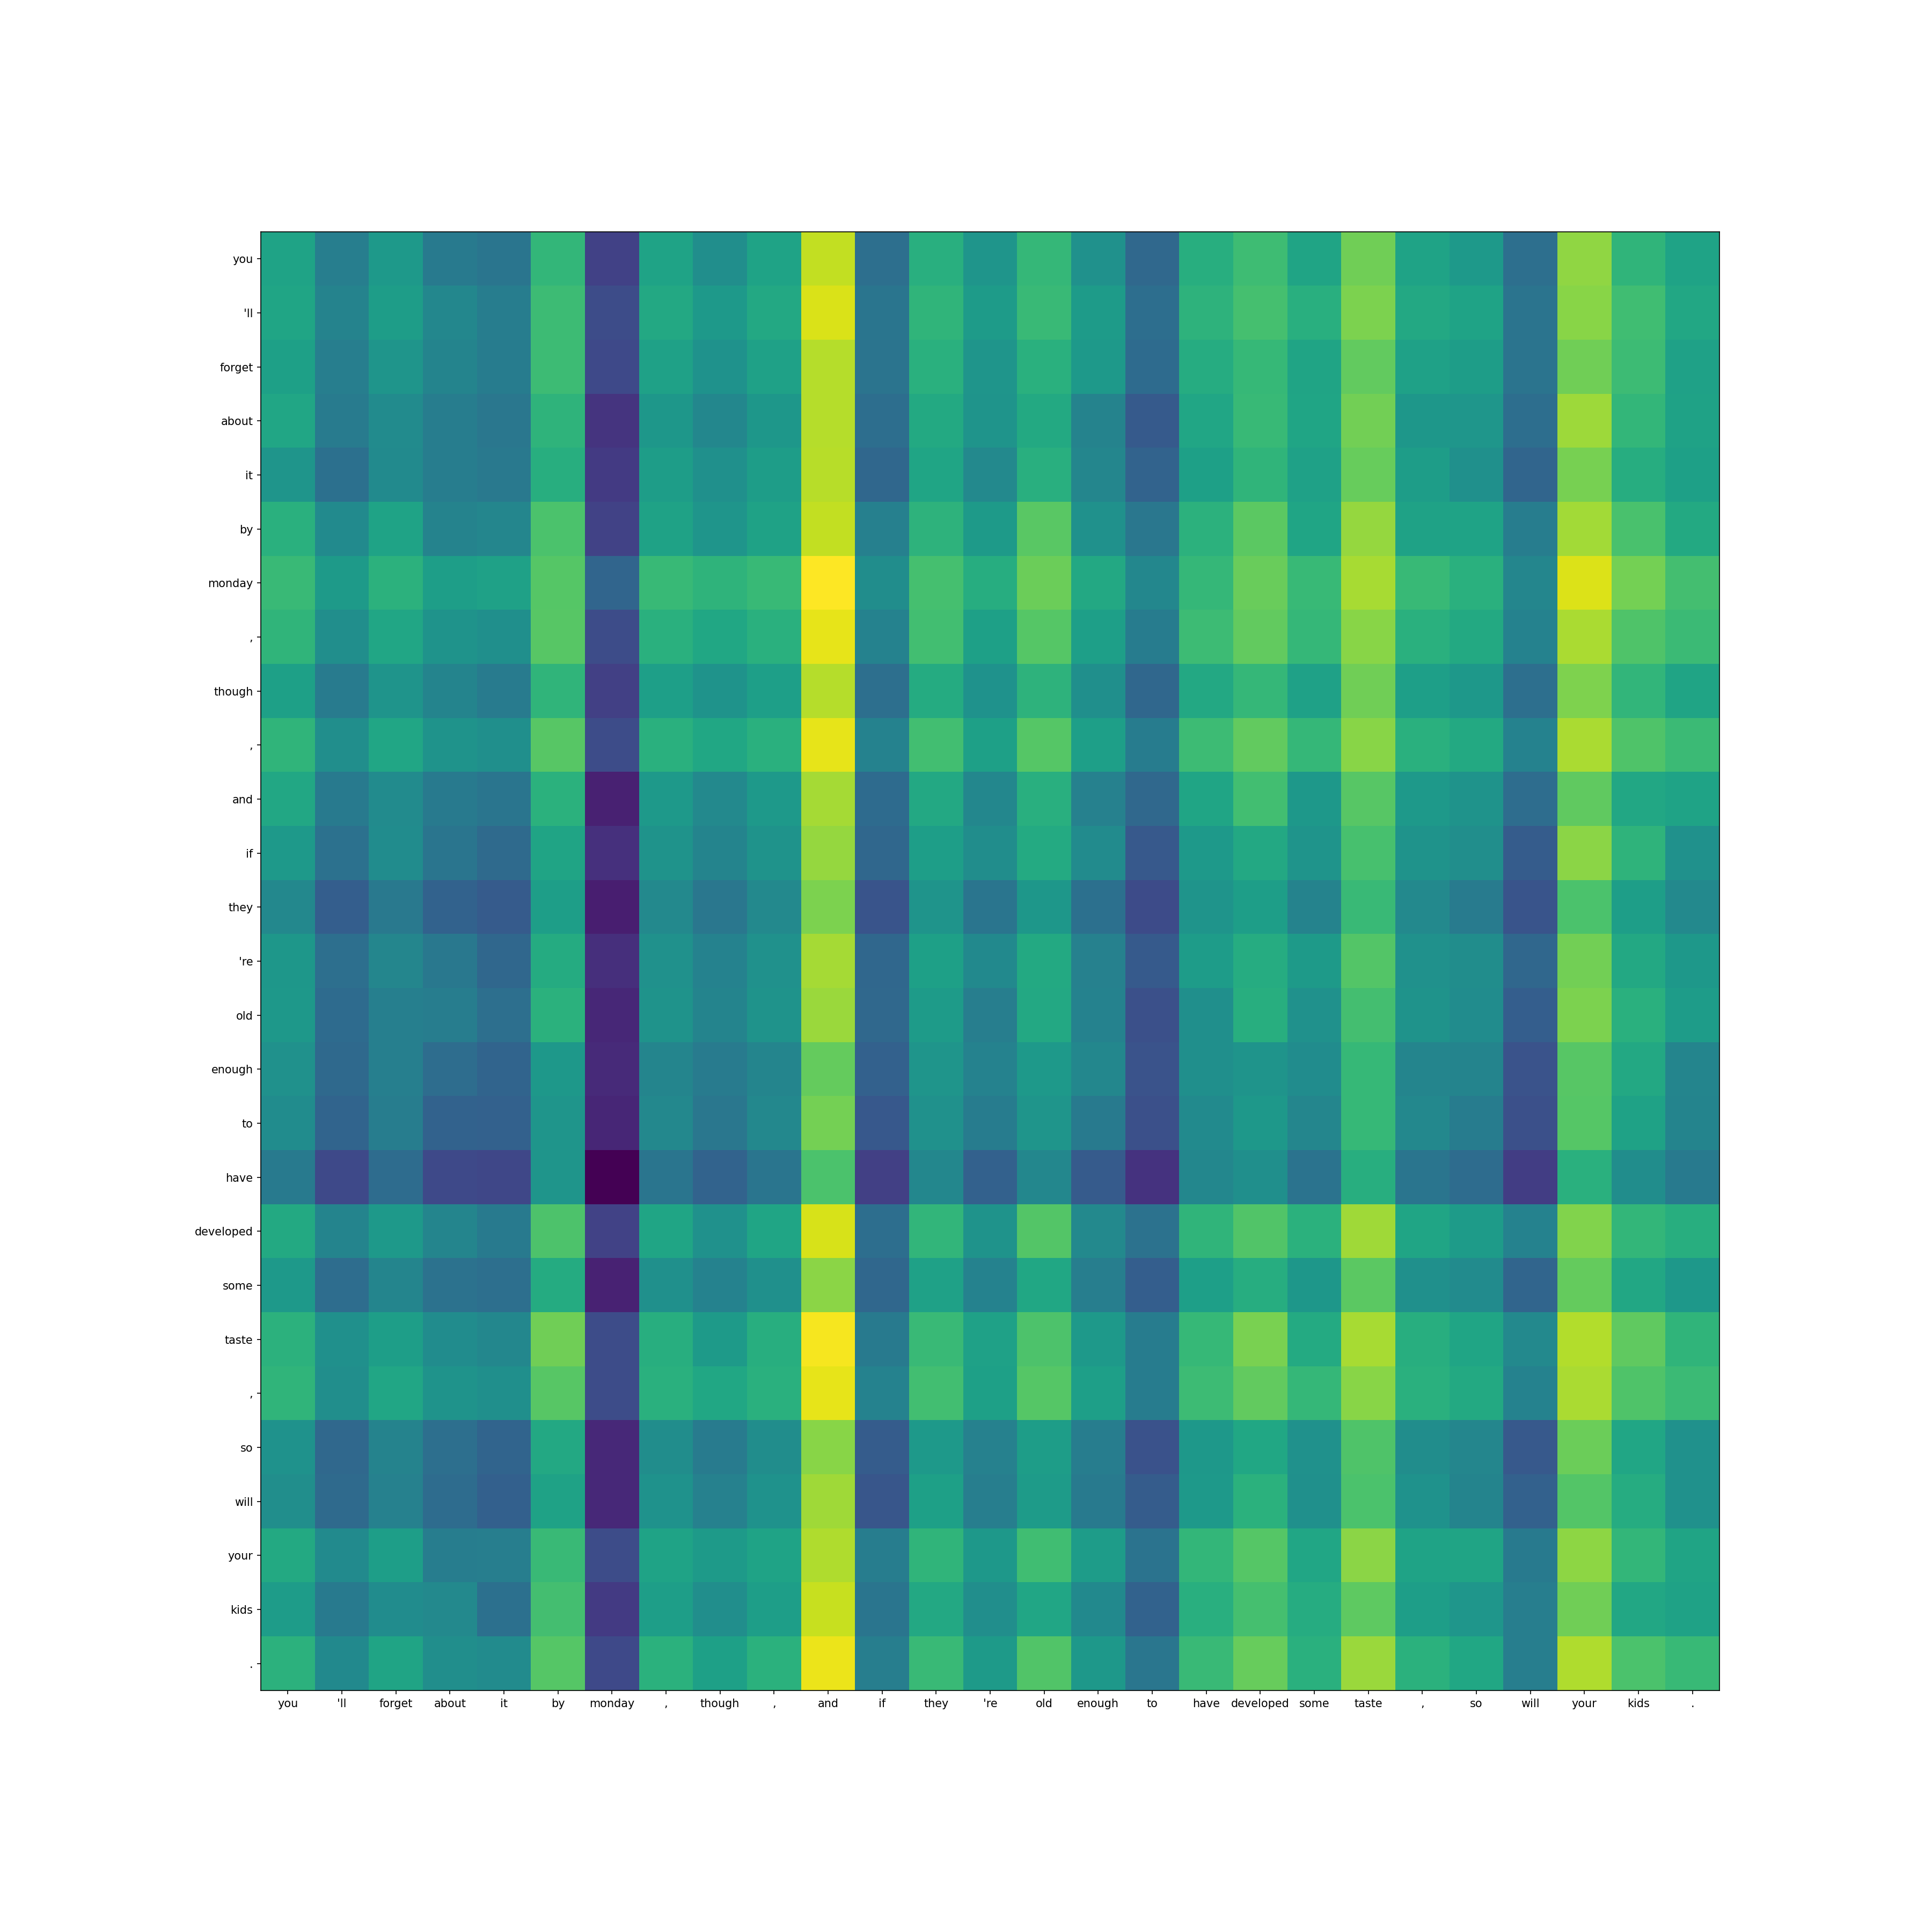 | 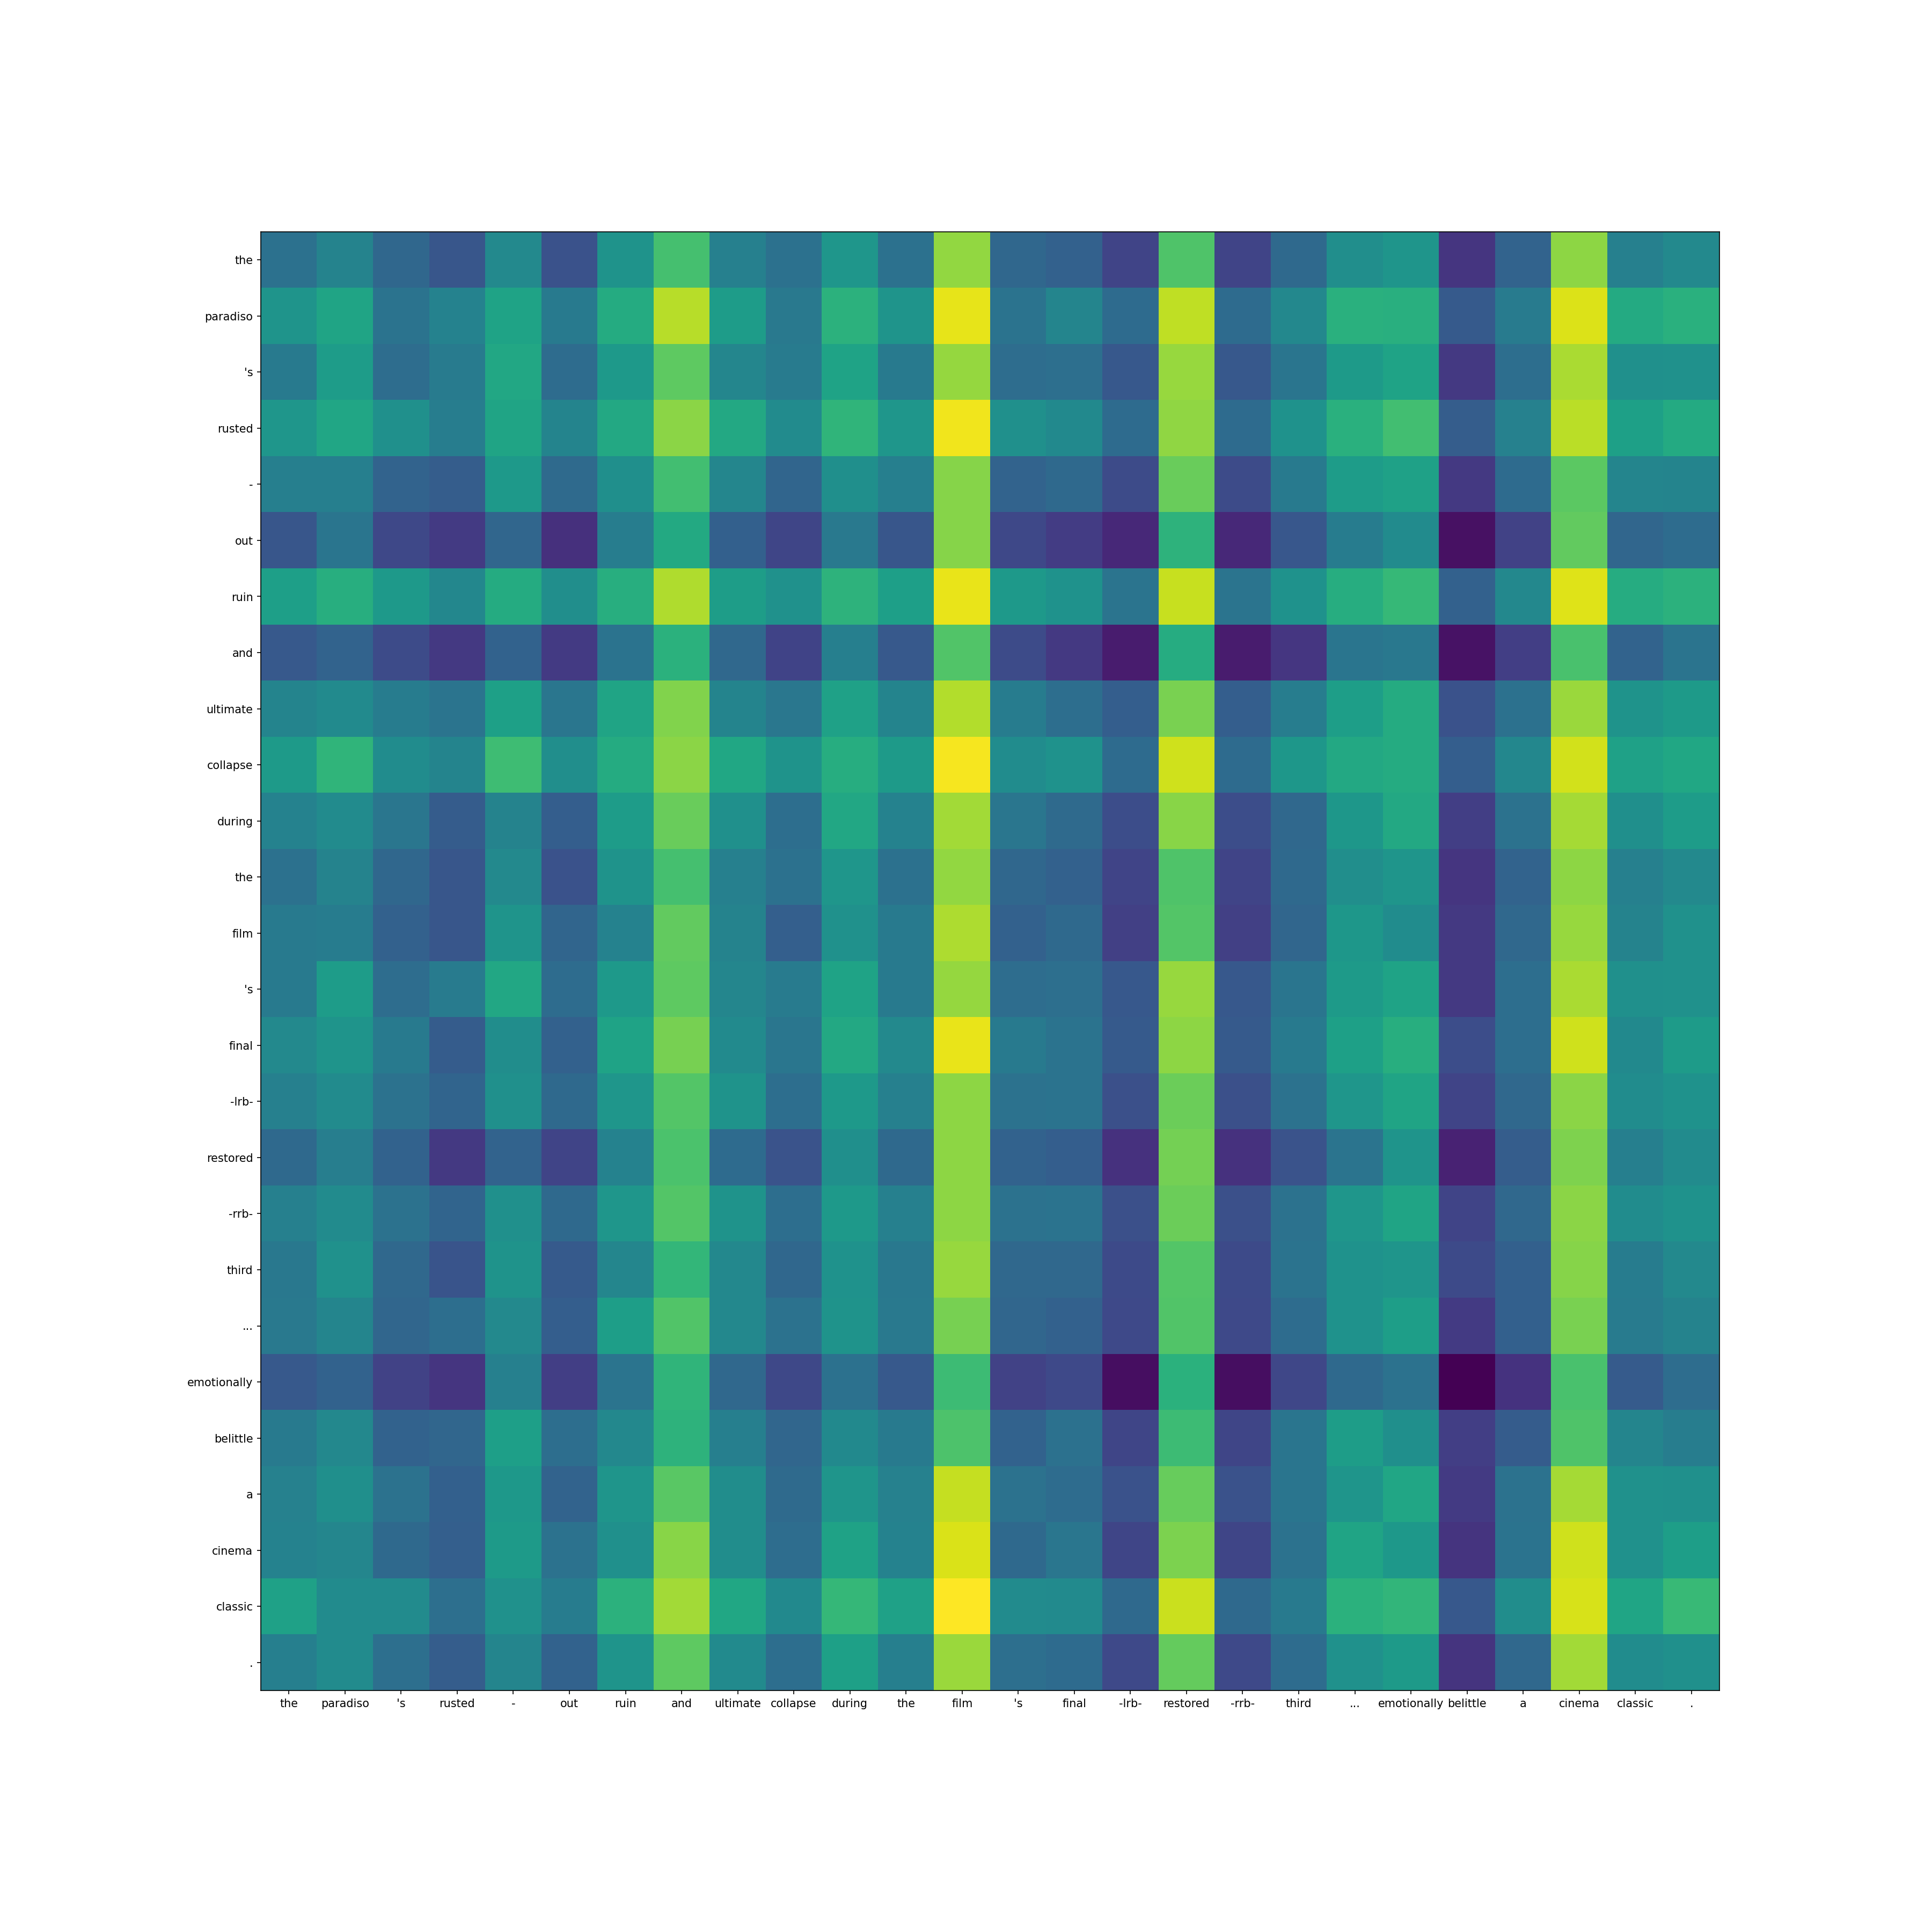

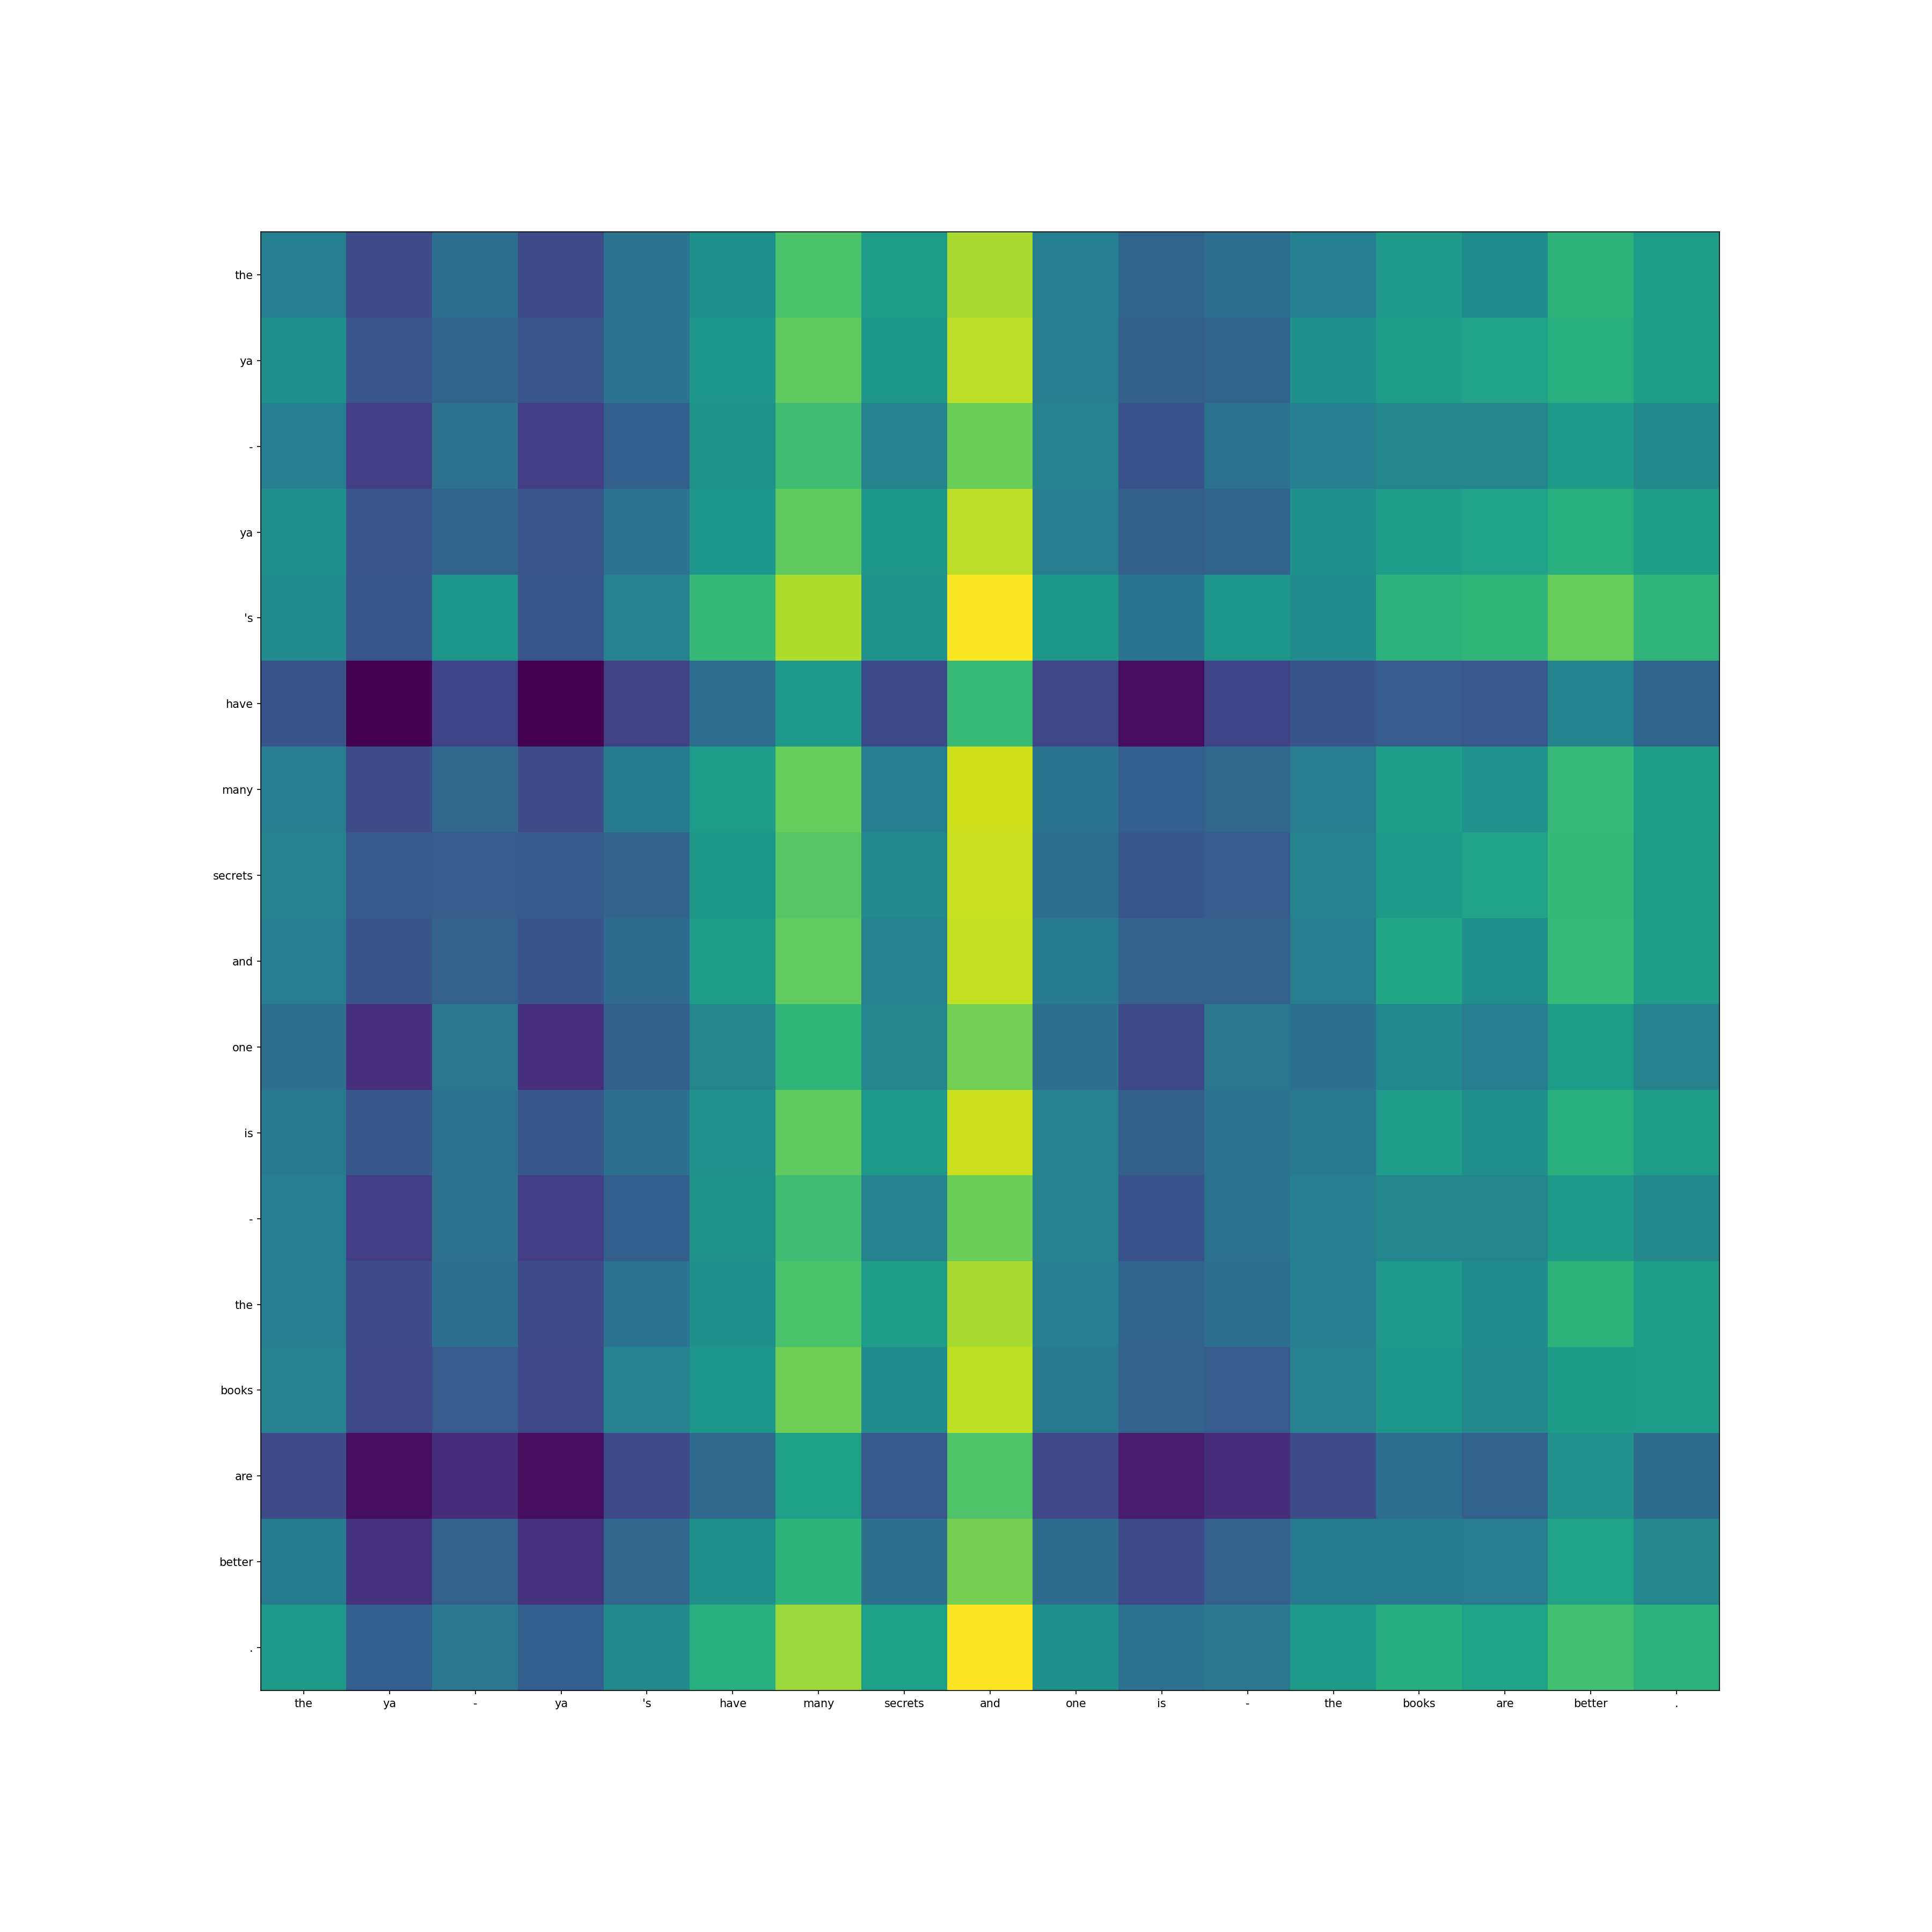

Another example of the net "focusing" on the connective words, and not extracting anything particularily meaningful about the sentence. it seems that the net as a whole is better at analysing positive reviews than negative ones, something that might be caused by size of dataset.

### External Code Usage

Positional Encoding was taken from : https://pytorch.org/tutorials/beginner/transformer_tutorial.html

LSTM Net layer was used from pytorch

Training was taken from Tutorials and previous homework assignments

## Conclusions and Closing Words

During work, we came to some conclusions in regards to the attention mechanism, and we've thought of some other models, and architectures, described in the papers.

### General Conclusions

* We've started our work by trying to quickly iterate and coming to some learning model, first using the "simpler" LSTM model. we've thought that we had some issue with our model, because our result was not converging, so we tested the flow by doing something we 
**Overfit the model on a single target.**
    by overfitting on a very small target, one review with one label, we've seen that the model in itself is solid, and the flow works, such that it was an issue with our hyper parameters. in our case, we had a case of vanishing gradients, as a result of a very long sequence of words, with 3+ layers in an LSTM, which as it turns out, is extremly deep(this makes sense of course). after iterating simply on a few parameters, we have found the set of parameters we were happy with.

* Having a general design of our code structure was very helpful, clearly seperating to a structure we've seen many times in the course homework - Loader, Model, Trainer, where the trainer integrates all the different building blocks made. reusing our code from the previous home assignments saved us a lot of time, and plenty of code which we didn't need to rewrite.

* Reading papers is much less scary than previously thought - both of us were pretty frightened from reading academic papers in the subject matter, and even though we wouldn't say that it's easy, it is deffinitly possible, feasable, and practical.

* Visualising the data, is very helpful in our understanding of what shape our data is, what is the task we are attempting to learn on. it helped us in the end understand what the network was actually able to learn, and using the attention maps was much more insightful than expected. it helped immensly with disarming the idea that the net was a black box, impenetrable to understanding what made it make a decision, but actually a model which learns specific ideas about a sentence(in our case), what it focused on, and what was more or less important. 

* Writing our code clearly and with some focus given to the DRY and SOLID ideas helped us in coordinating our efforts.

* We also tested out embedding sizes different than 300, and (unsurprisingly) we've seen lesser performance- it seems there was a lot of room for higher dimensional data, and the small dataset we've used benefited from more dimensions in the word embedding.

#### Other architectures and Models Tried

After reaching the performance we reached with our attention model(44.7% on test set on the finegrained labels), we tried to reach the performance of the paper with the multihead attention model. attached is the code we wrote for the model. the model design is based on the multihead attention layer, which is implemented in pytorch, which uses the mutlihead attention mechanism using the same dimension for the key, value, and query. for some reason we reached a valley in our perforance while trying to train on many different hyper parameters(at most, approx 42.9%),(layer count, LR, dropout, etc), and in the end we reached at maximum only inferior performance to the attention model. we've decided not to include the results in themselves, but instead add the code that we used in our attempt. 

#### Conclusions

Besides everything described above already, we've found that sentiment analysis, is a field where there are many advancements to be made in, and many concepts we read on too late to implement in our project (BERT Embedding, something more complex than the sinusoidal positional encoding, implementing a convolutional attention mechanism), but we think our results show interesting directions we could go to.